# Wine Quality Data


In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset into Pandas Dataframe
df=pd.read_csv(r"C:\Users\PRAVEENA PRAKASH\winequality.csv")

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.shape

(6497, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Schema

fixed acidity : Tartaric acid level; contributes to the wine's acidity and flavor stability

volatile acidity : Acetic acid level; high levels lead to an unpleasant vinegar taste

citric acid : Adds freshness and flavor; low levels can make wine taste flat

residual sugar : Remaining sugar after fermentation; affects sweetness

chlorides : Salt content; affects wine taste

free sulfur dioxide : Helps prevent microbial growth and oxidation

total sulfur dioxide : Sum of free and bound forms; excessive levels can affect taste

density : Affected by sugar and alcohol content; higher density usually means sweeter wine

pH : Inversely related to acidity; lower pH means more acidic

sulphates :	Adds to wine's antimicrobial and antioxidant properties

alcohol : Ethanol content by volume; typically correlates with perceived quality

quality : Score (0–10) representing the wine’s sensory quality rating

No categorical features are present; all attributes are numerical

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

## Data Cleaning

In [8]:
# Check about missing values to decide whether need to make any data cleaning or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is none of null values present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [10]:
# Check and remove duplicate rows if any
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates
df = df.drop_duplicates()

Duplicate rows: 1179


## Data Visualizatiion

### Distribution of Wine Quality Ratings

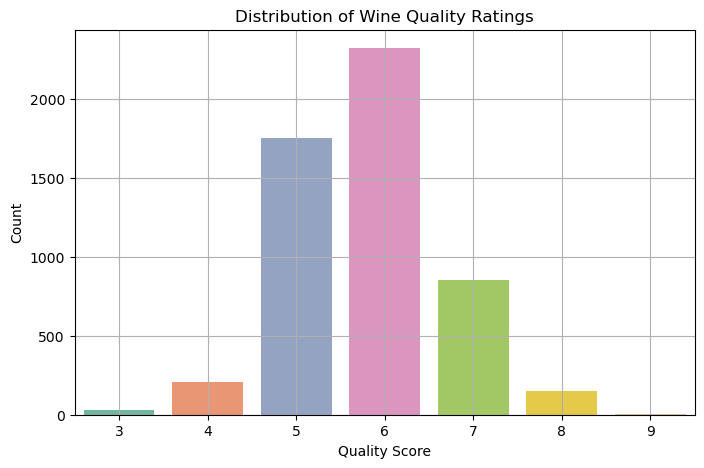

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

* The majority of wines are rated with a quality score of 6, followed by 5, indicating that most wines fall into the average quality category.
* Very few wines achieve high scores (8 or above), suggesting limited representation of premium quality wines in the dataset.
* Low quality scores (3–4) are also relatively rare, showing that extremely poor-quality wines are uncommon in this dataset.

### Distribution of all features

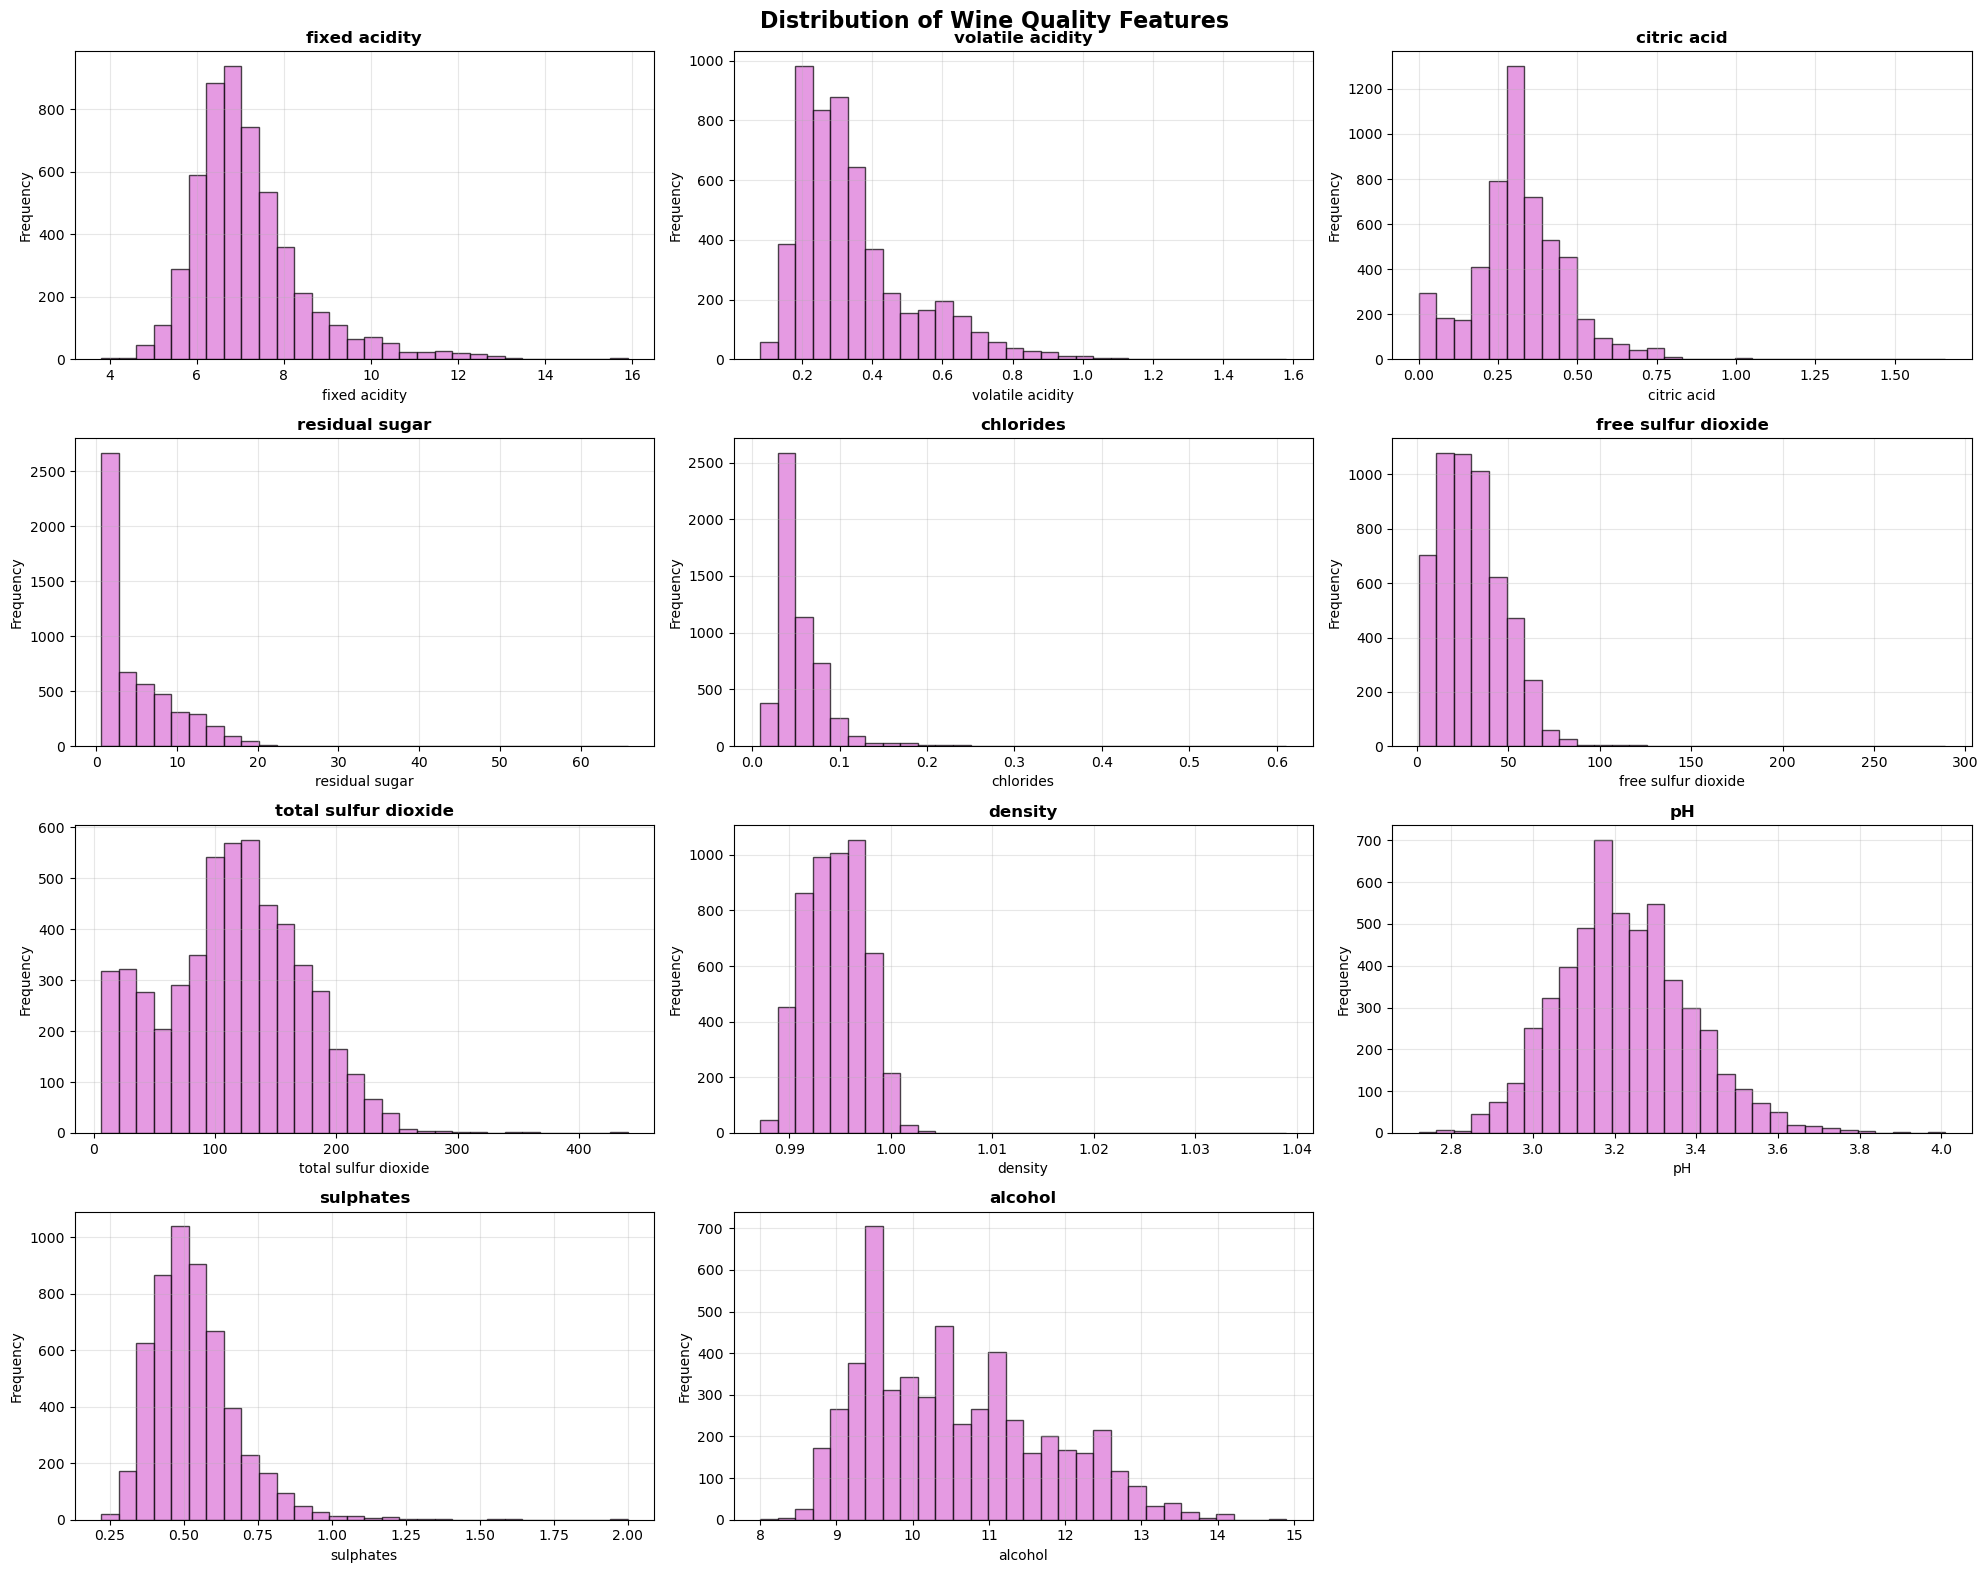

In [42]:
# Create subplots for distribution of all features
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle('Distribution of Wine Quality Features', fontsize=16, fontweight='bold')

columns = df.columns
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, edgecolor='black', color='orchid')
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
axes[11].remove()
plt.tight_layout()
plt.show()

* Fixed Acidity: Right-skewed distribution, most wines have lower fixed acidity levels (6-8 range)
* Volatile Acidity: Heavily right-skewed, concentrated around 0.2-0.6 range with few high outliers
* Citric Acid: Right-skewed with peak near 0, many wines have very low citric acid content
* Residual Sugar: Extremely right-skewed, most wines are dry (low sugar) with few sweet outliers
* Chlorides: Right-skewed distribution centered around 0.05-0.1 range
* Free Sulfur Dioxide: Right-skewed, most values concentrated in lower range (10-40)
* Total Sulfur Dioxide: Right-skewed distribution with peak around 50-100 range
* Density: Nearly normal distribution, well-centered around 0.996-0.998
* pH: Approximately normal distribution, centered around 3.2-3.4
* Sulphates: Right-skewed, concentrated around 0.4-0.8 range
* Alcohol: Slightly right-skewed, most wines have alcohol content between 9-12%
    
1. Most features show right-skewed distributions - indicating that extreme values are more common on the higher end
2. Density and pH show near-normal distributions - suggesting these are well-regulated wine characteristics
3. Residual sugar has the most extreme skewness - reflecting that most wines are dry with only a few sweet varieties
4. Volatile acidity and citric acid concentrations are typically low - which is expected for quality wines
5. The distributions suggest natural constraints - wine chemistry has inherent limits that create these characteristic distribution shapes

### Alcohol Content by Wine Quality

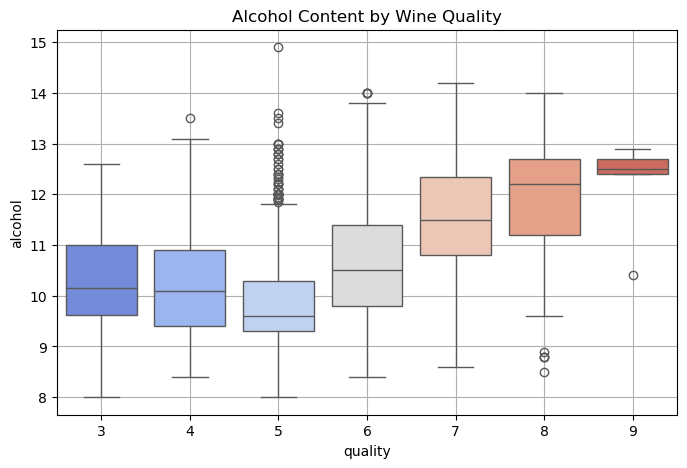

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')
plt.title('Alcohol Content by Wine Quality')
plt.grid(True)
plt.show()

* Wines with higher quality scores (7 to 9) generally have higher median alcohol content, indicating a positive correlation between alcohol level and wine quality.
* Lower quality wines (scores 3 to 5) tend to have lower alcohol content and wider variability, suggesting less consistency in alcohol levels.
* The tight interquartile range for quality 9 wines reflects high consistency in alcohol levels among top-rated wines.

### Average Feature Values per Quality Level

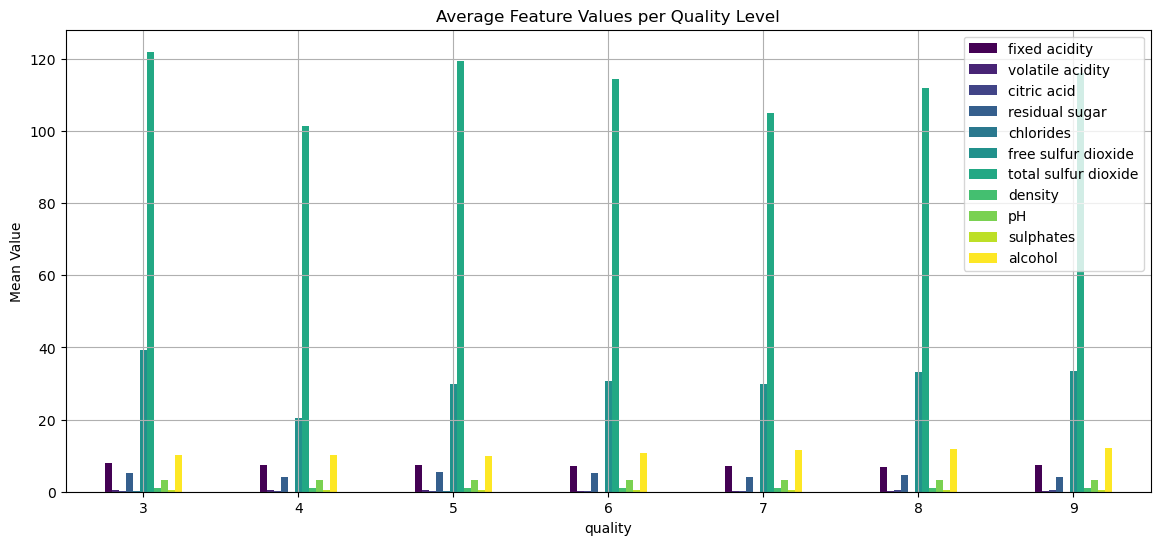

In [14]:
df.groupby('quality').mean().plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('Average Feature Values per Quality Level')
plt.ylabel('Mean Value')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

* Alcohol and sulphates show a consistent increase with rising wine quality, indicating their positive influence on better-rated wines.
* Volatile acidity and chlorides exhibit a declining trend with higher quality scores, suggesting they negatively affect wine quality.
* Other features such as residual sugar, citric acid, and density remain relatively stable across quality levels, showing less direct impact on quality.

### Alcohol vs pH

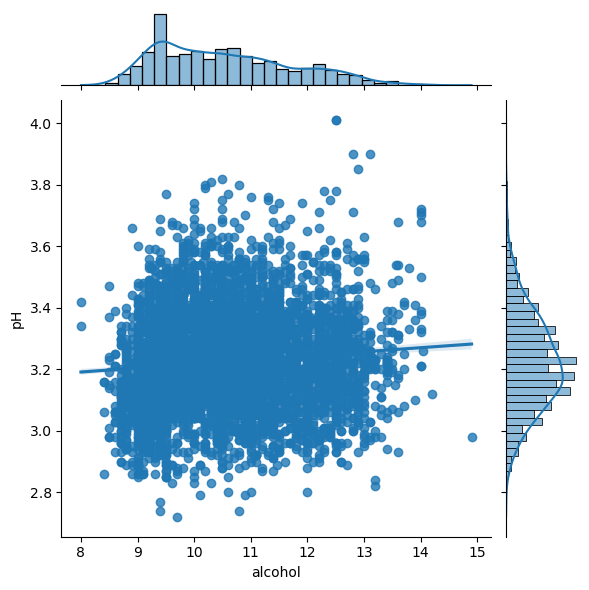

In [15]:
sns.jointplot(x='alcohol',y='pH',data=df, kind='reg')

* Alcohol content (x-axis) is normally distributed, ranging from about 8% to 15%, with most wines clustering around 9-12%
* pH levels (y-axis) show a tight distribution between 2.8-4.0, with the majority concentrated around 3.0-3.6
* There's a weak positive correlation between alcohol and pH - as alcohol content increases, pH tends to increase slightly
* The regression line shows this gentle upward trend, but with considerable scatter around it
* Most data points cluster in the 9-12% alcohol and 3.0-3.6 pH range, indicating this is the typical wine profile

### Correlation Matrix of Wine Features

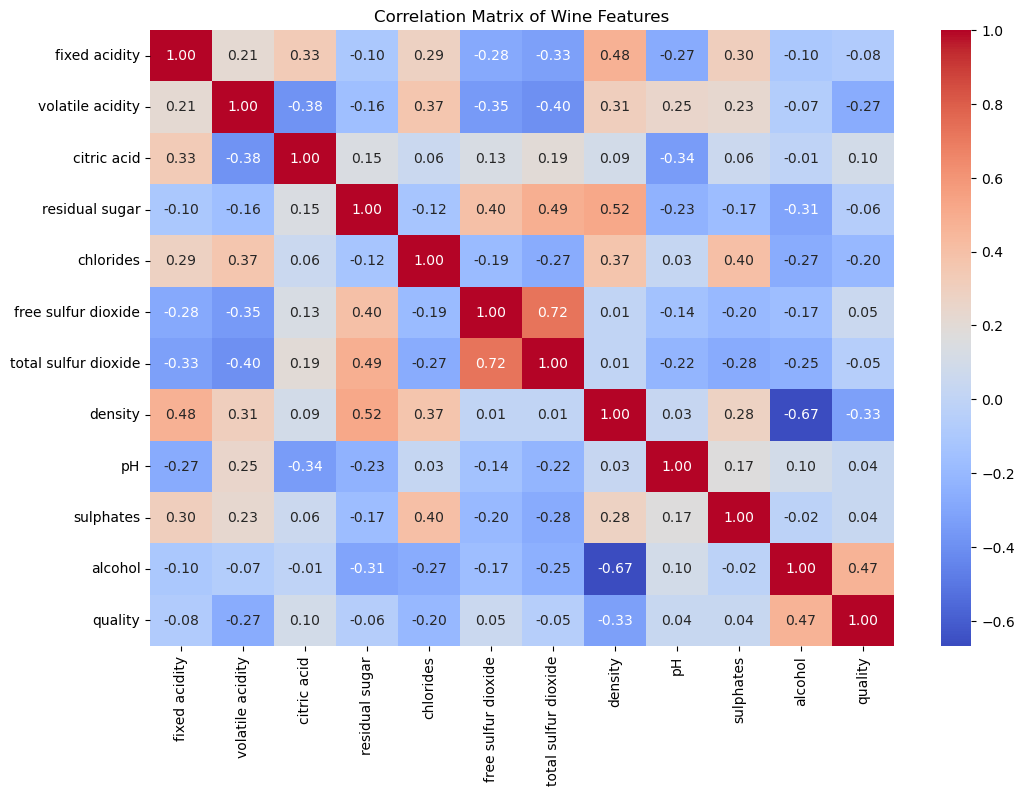

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

* Alcohol shows the strongest positive correlation with wine quality (0.47), indicating it is a key driver of higher ratings.
* Volatile acidity has a notable negative correlation with quality (-0.27), suggesting higher acidity is associated with lower-rated wines.
* Features like sulphates (0.04), citric acid (0.10), and density (-0.33) show weaker or inconsistent correlations, implying a more complex influence on wine quality.

### Density of Alcohol by Quality

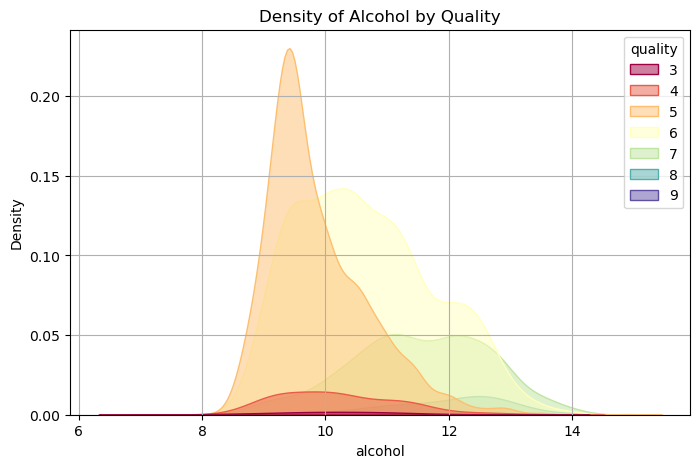

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='alcohol', hue='quality', fill=True, palette='Spectral', alpha=0.5)
plt.title('Density of Alcohol by Quality')
plt.grid(True)
plt.show()

* Higher quality wines (7–9) tend to have higher alcohol concentrations, with their density curves peaking around 12–13% alcohol.
* In contrast, lower quality wines (3–5) are concentrated in the 9–10% alcohol range, indicating a lower alcohol profile.
* The progressive shift to the right across quality levels confirms a positive relationship between alcohol content and wine quality.

### Volatile Acidity by Wine Quality

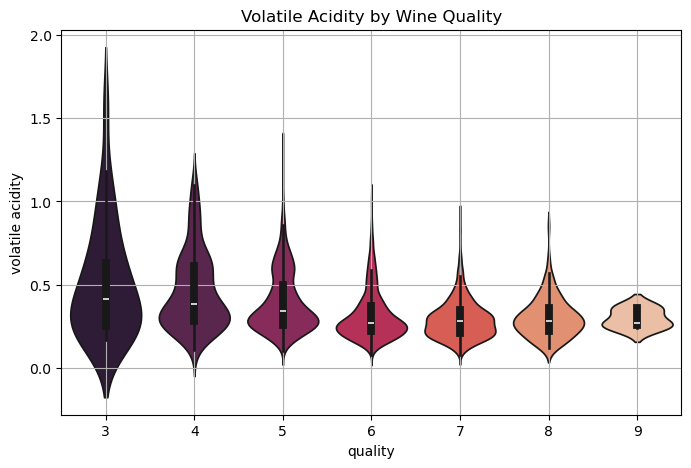

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='volatile acidity', data=df, palette='rocket')
plt.title('Volatile Acidity by Wine Quality')
plt.grid(True)
plt.show()

* Volatile acidity shows a clear decreasing trend as wine quality increases, indicating that lower volatile acidity is associated with better-rated wines.
* Lower quality wines (3–5) exhibit a wider and higher spread of volatile acidity values, suggesting greater inconsistency.
* High-quality wines (8–9) have tightly concentrated and lower volatile acidity, reinforcing its role as a negative indicator of wine quality.

### Density plot to check linearity

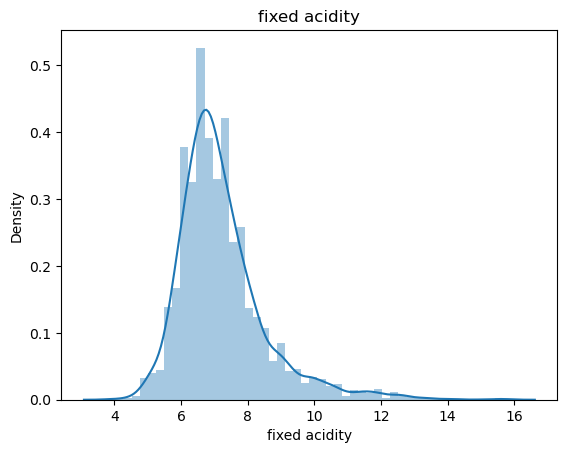

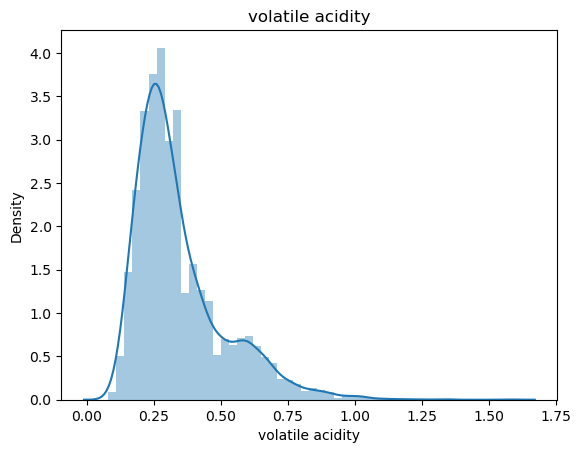

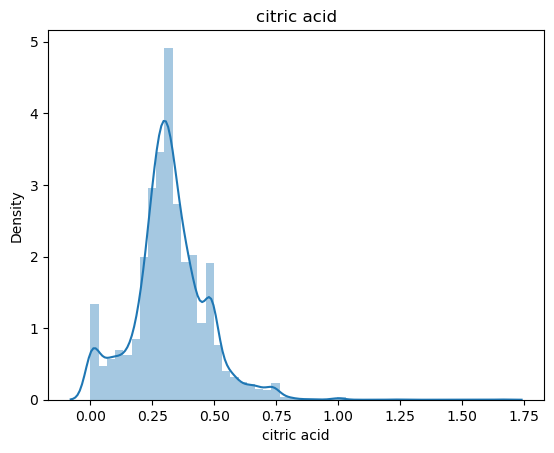

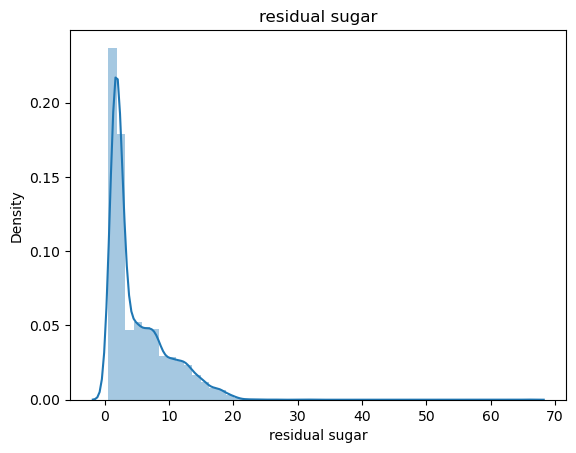

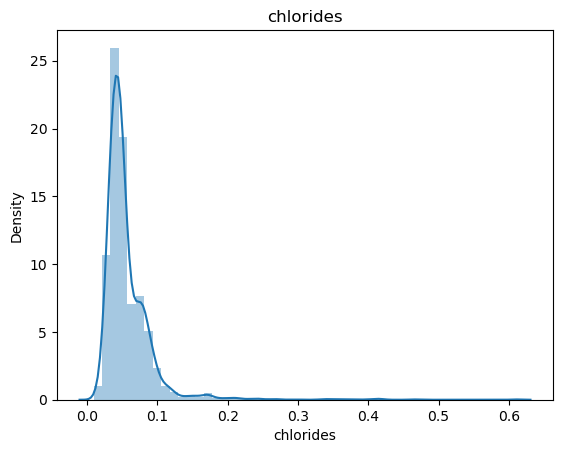

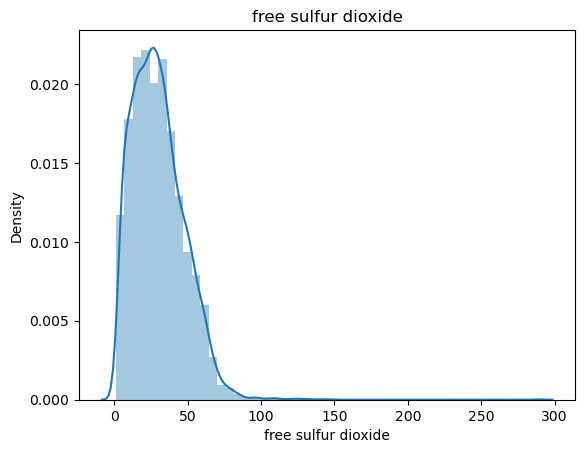

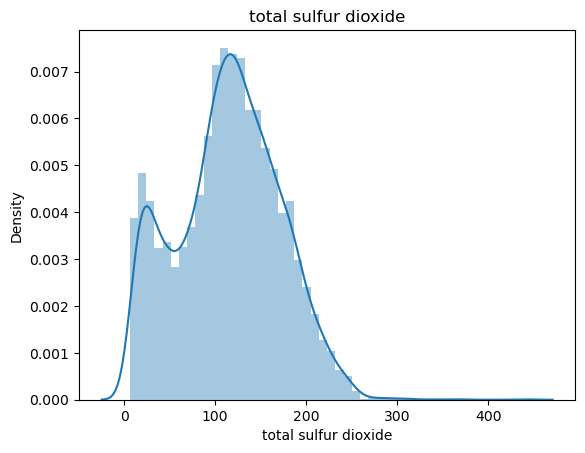

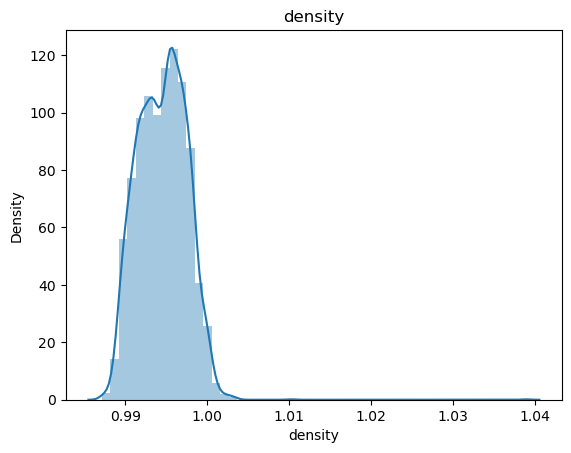

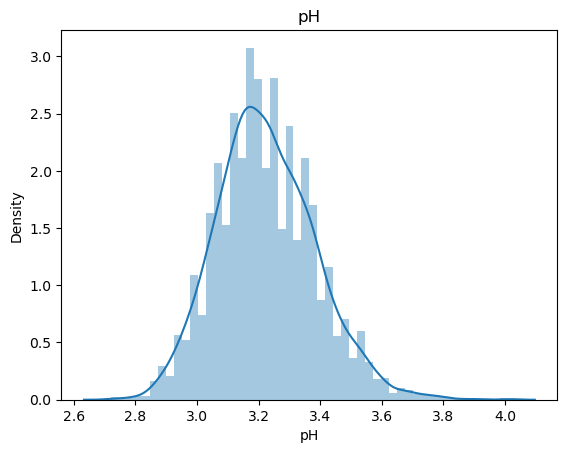

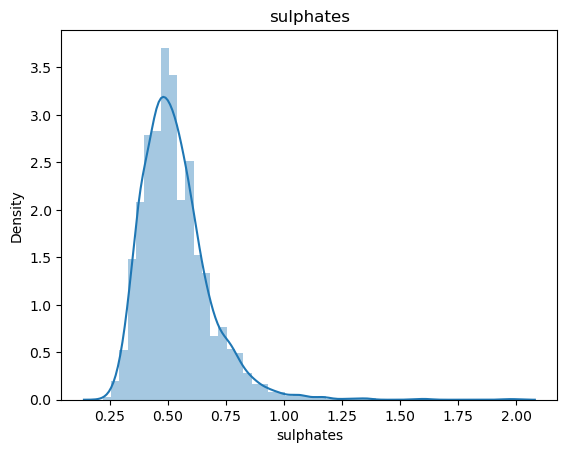

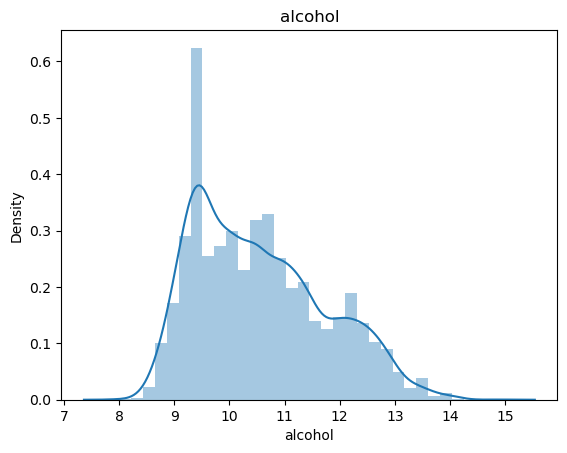

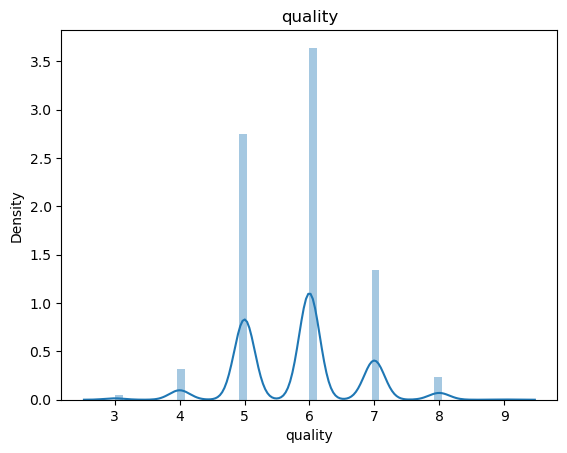

In [19]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()


1. Fixed Acidity: Shows a right-skewed distribution with most values concentrated in the lower range, indicating non-normal distribution.

2. Volatile Acidity: Exhibits a highly right-skewed distribution with a long tail, suggesting potential outliers and non-linear characteristics.

3. Citric Acid: Displays an irregular, multi-modal distribution with several peaks, indicating complex underlying patterns.

4. Residual Sugar: Shows extreme right skewness with most values clustered near zero and a very long tail, typical of concentration measurements.

5. Chlorides: Similar to residual sugar, exhibits right skewness with potential outliers in the tail.

6. Free Sulfur Dioxide: Demonstrates right-skewed distribution with moderate spread.

7. Total Sulfur Dioxide: Shows right skewness but with a broader distribution than free sulfur dioxide.

8. Density: Appears to have a more normal-like distribution, which is closer to linear assumptions.

9. pH: Exhibits a relatively normal distribution, suggesting better linearity characteristics.

10. Sulphates: Shows right skewness with concentration in lower values.

11. Alcohol: Displays a somewhat normal distribution with slight right skew.

12. Quality: Shows discrete values (being a rating scale) with concentration around middle ratings (5-6).

    
Most chemical composition features (volatile acidity, residual sugar, chlorides, sulfur compounds) show right-skewed distributions, indicating that most wines have lower concentrations with few wines having high concentrations.

### *Quality Distribution Analysis

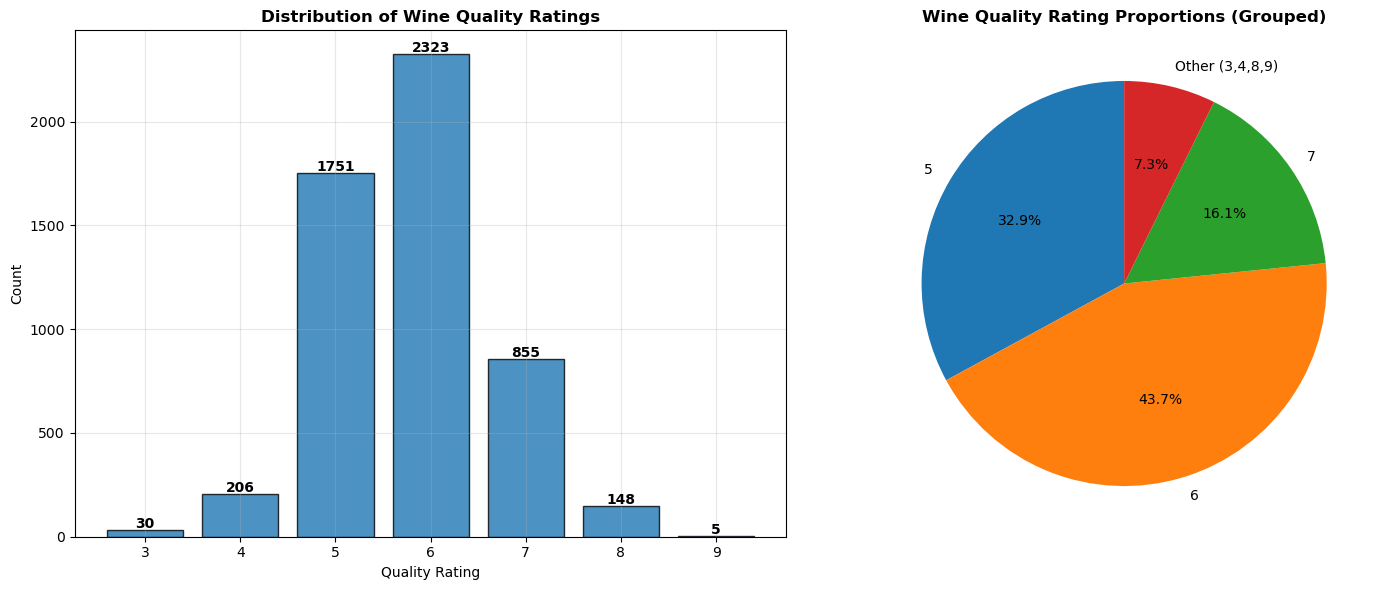

In [69]:
# Quality distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for quality counts (unchanged)
quality_counts = df['quality'].value_counts().sort_index()
ax1.bar(quality_counts.index, quality_counts.values, alpha=0.8, edgecolor='black')
ax1.set_title('Distribution of Wine Quality Ratings', fontweight='bold')
ax1.set_xlabel('Quality Rating')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(quality_counts.values):
    ax1.text(quality_counts.index[i], v + 10, str(v), ha='center', fontweight='bold')

# Pie chart with grouped categories
quality_counts_grouped = quality_counts.copy()

# Group ratings 3, 4, 8, 9 together
other_ratings = [3, 4, 8, 9]
other_count = sum(quality_counts_grouped[rating] for rating in other_ratings if rating in quality_counts_grouped.index)

# Remove individual other ratings and add grouped category
for rating in other_ratings:
    if rating in quality_counts_grouped.index:
        quality_counts_grouped = quality_counts_grouped.drop(rating)

# Add the grouped category
quality_counts_grouped['Other (3,4,8,9)'] = other_count

# Create pie chart with grouped data
ax2.pie(quality_counts_grouped.values, labels=quality_counts_grouped.index, autopct='%1.1f%%', 
        startangle=90)
ax2.set_title('Wine Quality Rating Proportions (Grouped)', fontweight='bold')

plt.tight_layout()
plt.show()

* Bar chat shows the frequency distribution of wine quality ratings from 3-9, with actual counts displayed on each bar.
* Pie chart shows the same data as percentages, with ratings grouped into categories (5, 6, 7, and "Other" which includes ratings 3, 4, 8, 9).

1. Normal Distribution Pattern: The wine quality ratings follow a bell curve distribution, with most wines clustered around average quality (ratings 5-6).
2. Quality 6 Dominates: Rating 6 is the most common (2323 wines, 43.7%), followed by rating 5 (1731 wines, 32.9%). Together, these two ratings account for about 76% of all wines.
3. Extreme Ratings Are Rare: Very low (3-4) and very high (8-9) quality wines are uncommon, making up only about 14% combined. This suggests either:
* Most wines are of moderate quality
* The rating scale tends toward the middle range
* High-quality wines are genuinely rare
4. Rating Scale Usage: The dataset uses a 7-point scale (3-9), but the effective range shows ratings 5-7 capture the vast majority of wines, indicating a compressed quality distribution.

### Pairwise Scatter Plots for Key Features

<Figure size 1500x1200 with 0 Axes>

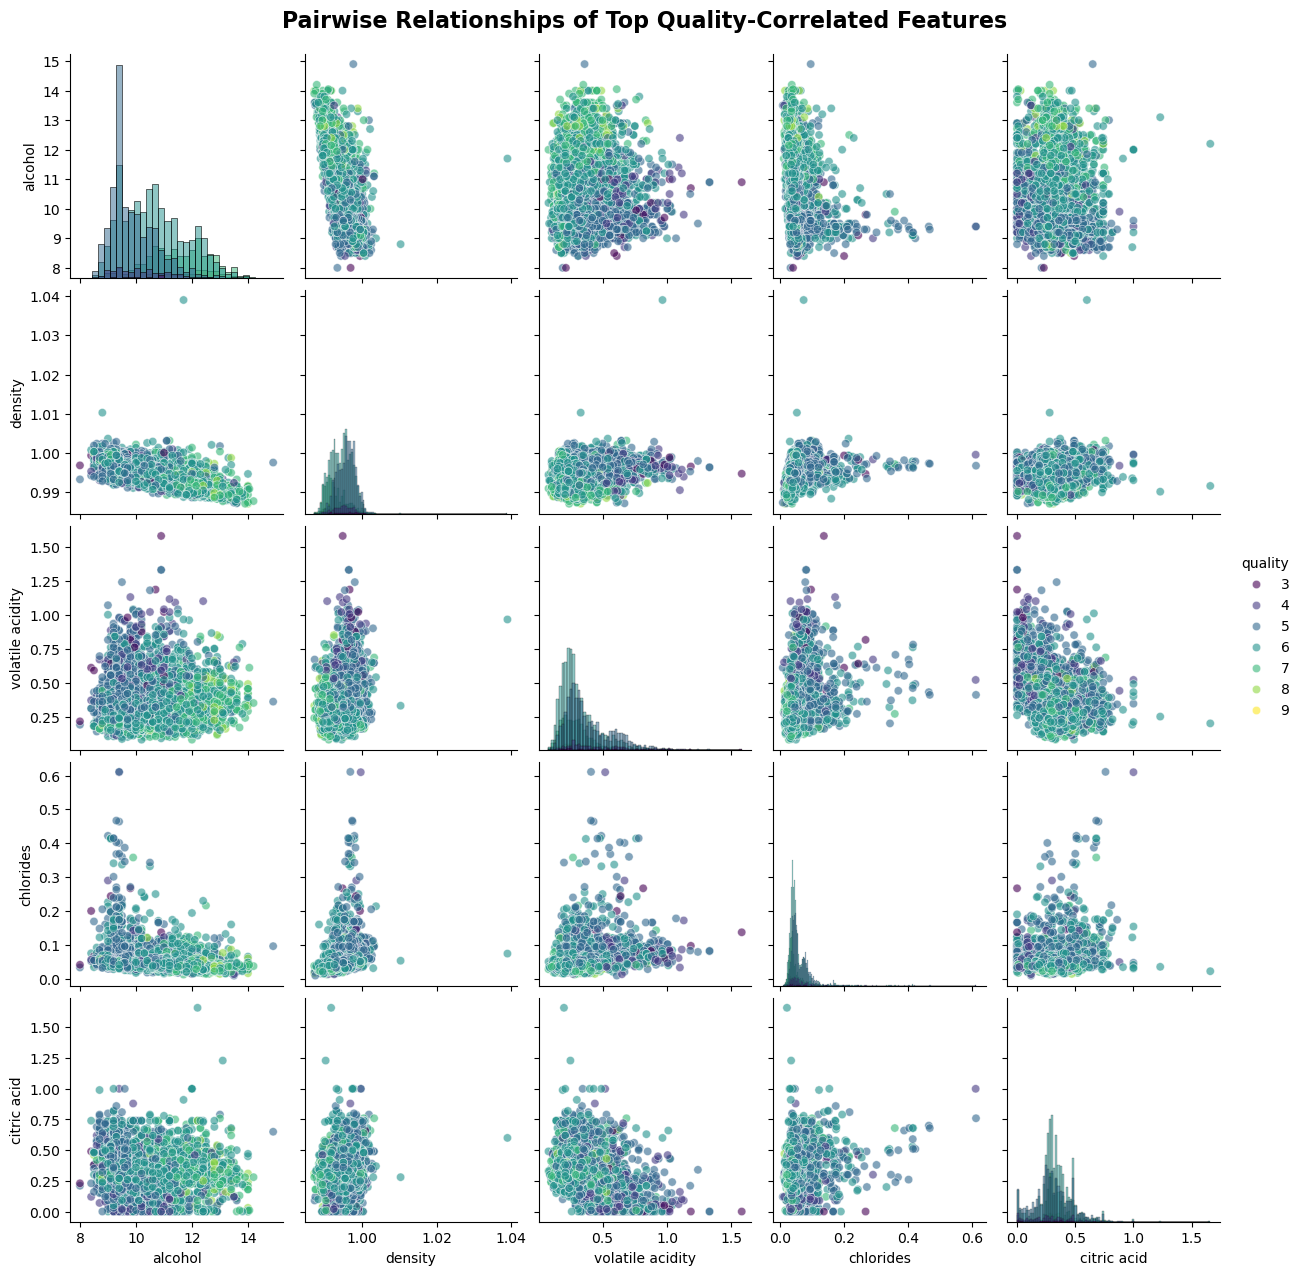

In [55]:
# Select most correlated features with quality
quality_corr = df.corr()['quality'].abs().sort_values(ascending=False)
top_features = quality_corr.head(6).index.tolist()  # Top 5 + quality itself

# Create pairplot
plt.figure(figsize=(15, 12))
sns.pairplot(df[top_features], hue='quality', palette='viridis', 
             plot_kws={'alpha': 0.6}, diag_kind='hist')
plt.suptitle('Pairwise Relationships of Top Quality-Correlated Features', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

1. Alcohol Content is Crucial: The alcohol vs quality plots show a clear positive trend - higher quality wines tend to have higher alcohol content (11-14% range for top wines).
2. Volatile Acidity Impact: Lower volatile acidity generally correlates with better quality wines, suggesting that excessive volatile acidity (vinegar-like taste) negatively affects wine quality.
3. Sulphates Enhancement: Higher sulphate levels appear associated with better quality wines, likely due to their role as antioxidants and preservatives.
4. Citric Acid Contribution: Moderate to higher citric acid levels tend to correlate with better quality, contributing to wine freshness and flavor complexity.
5. Quality Clustering: You can see distinct color clustering in many plots, where higher quality wines (darker colors) occupy specific regions, indicating these chemical properties work together to determine quality.
6. Feature Interactions: The plots reveal that wine quality isn't determined by single factors but by combinations of these chemical characteristics working synergistically.

### Correlation Coefficient

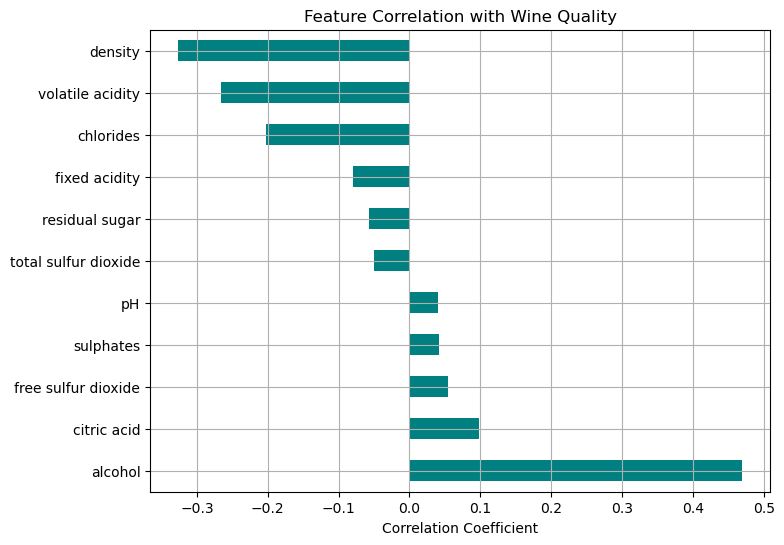

In [20]:
correlation = df.corr()['quality'].drop('quality').sort_values(ascending=False)
correlation.plot(kind='barh', figsize=(8, 6), color='teal')
plt.title('Feature Correlation with Wine Quality')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

* Alcohol has the strongest positive correlation (0.47) with wine quality, making it the most influential predictor.
* Volatile acidity, density, and chlorides show moderate negative correlations, suggesting their reduction could enhance wine quality.
* Other features like citric acid and sulphates show weak positive correlations, indicating a limited but supportive role in determining quality.

### Residual Sugar vs Density vs Quality

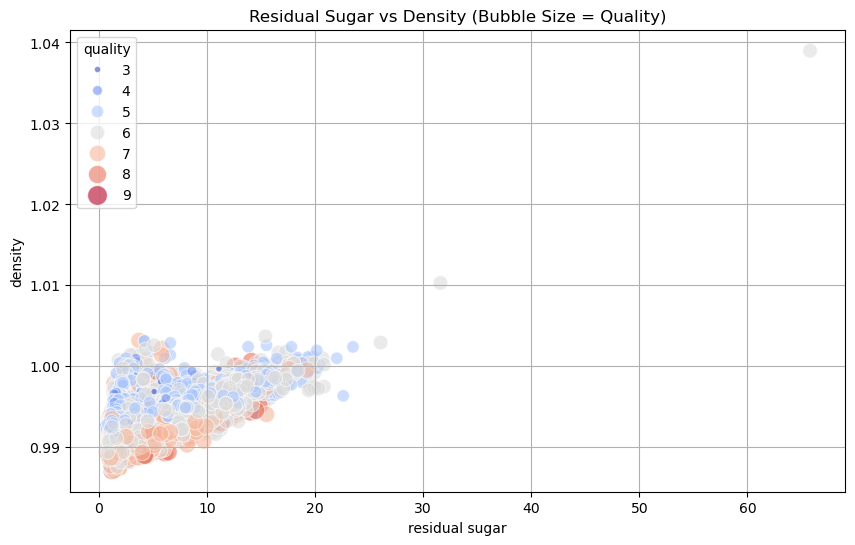

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', size='quality', hue='quality',
                data=df, sizes=(20, 200), palette='coolwarm', alpha=0.6)
plt.title('Residual Sugar vs Density (Bubble Size = Quality)')
plt.grid(True)
plt.show()

* Residual sugar and density exhibit a positive relationship, with higher sugar levels generally resulting in increased density.
* Most wines, especially those with higher quality (7–9), are clustered in the low sugar and low density range, suggesting balance is preferred.
* Wines with very high residual sugar and density are rare and do not show a clear association with higher quality, indicating limited benefit of excess sweetness.

### pH vs Wine Quality

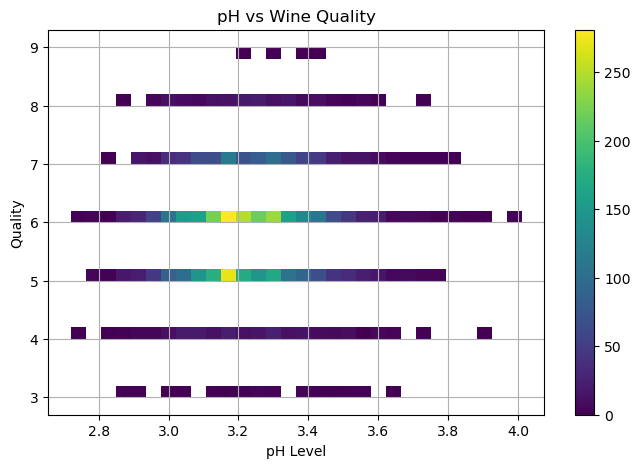

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='pH', y='quality', bins=30, cmap='viridis', cbar=True)
plt.title('pH vs Wine Quality')
plt.xlabel('pH Level')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

* Most wines are concentrated within the pH range of 3.1 to 3.4, especially those rated with quality scores of 5 and 6, indicating a neutral to slightly acidic profile is common.
* Higher quality wines (7–9) do not show a distinct pH preference, suggesting pH alone is not a strong differentiator for premium wines.
* The heatmap shows no clear linear pattern between pH levels and wine quality, implying that pH has a minimal or indirect influence on perceived wine quality.

### Residual Sugar and Chlorides Analysis

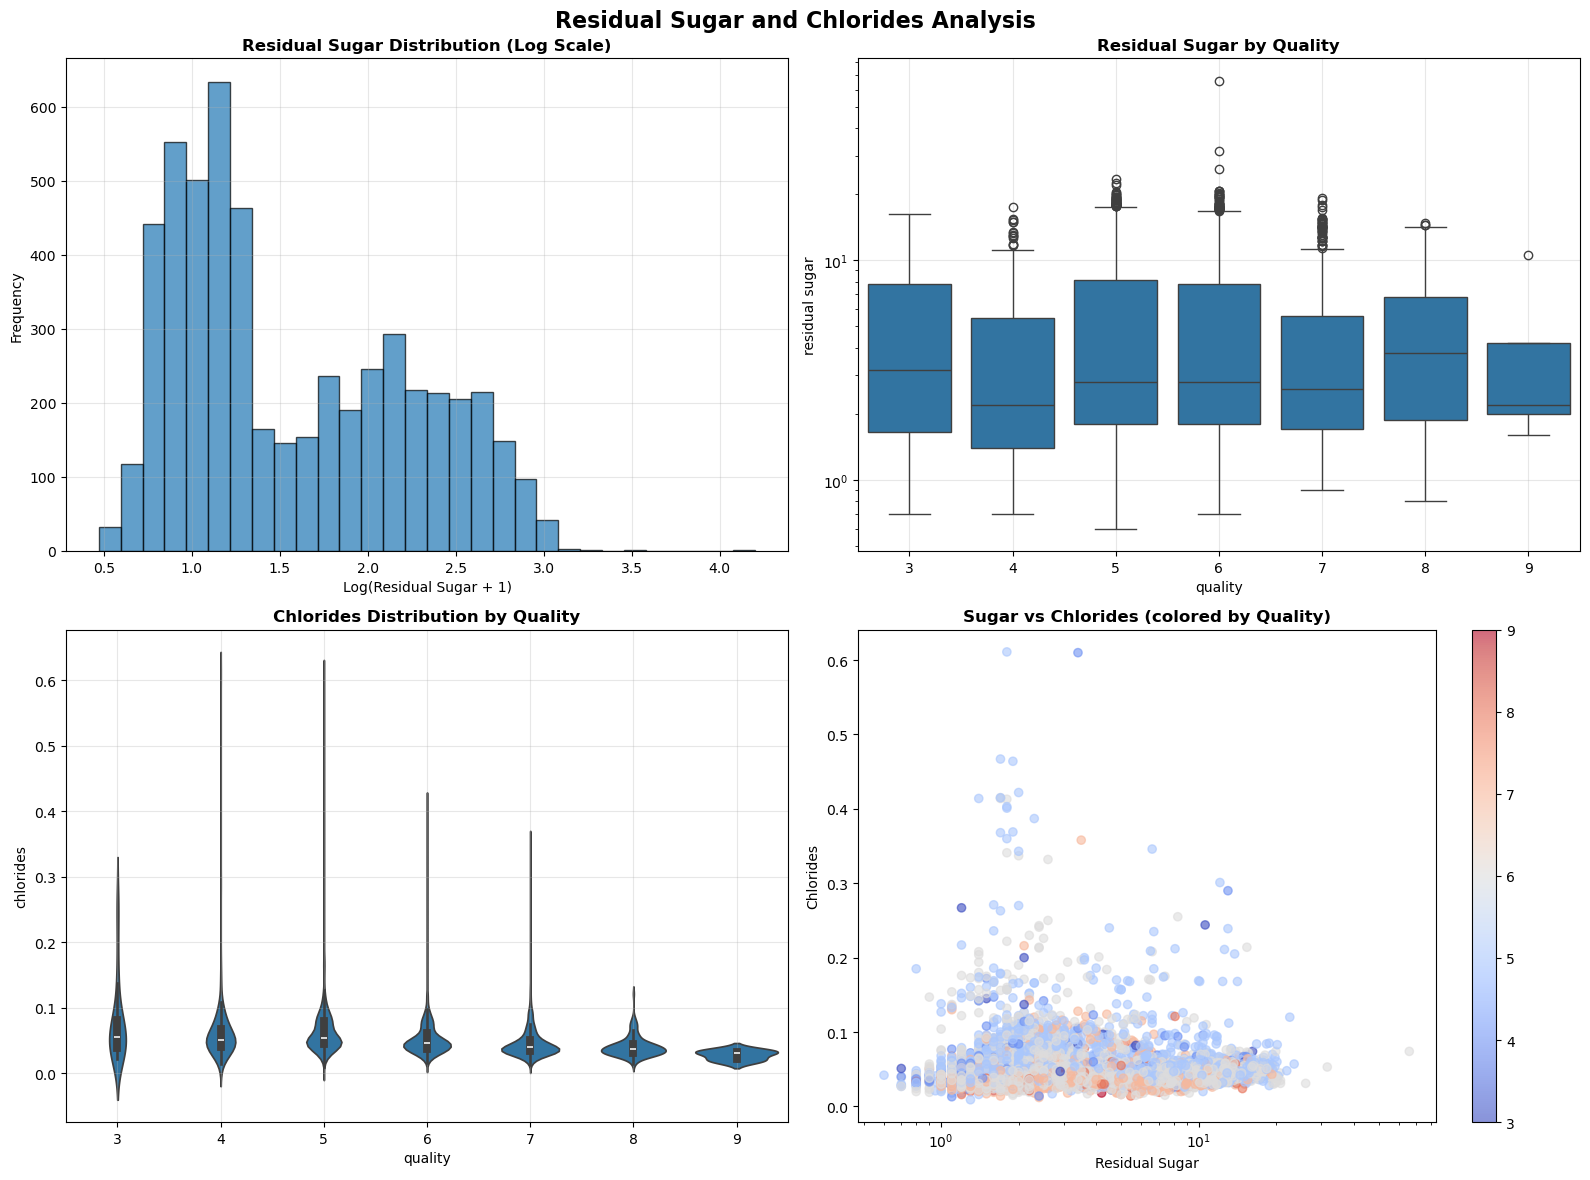

In [59]:
# Sugar and chlorides analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Residual Sugar and Chlorides Analysis', fontsize=16, fontweight='bold')

# Residual sugar distribution (log scale due to high variance)
axes[0,0].hist(np.log1p(df['residual sugar']), bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Log(Residual Sugar + 1)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Residual Sugar Distribution (Log Scale)', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Sugar vs Quality
sns.boxplot(data=df, x='quality', y='residual sugar', ax=axes[0,1])
axes[0,1].set_title('Residual Sugar by Quality', fontweight='bold')
axes[0,1].set_yscale('log')  # Log scale due to outliers
axes[0,1].grid(True, alpha=0.3)

# Chlorides vs Quality
sns.violinplot(data=df, x='quality', y='chlorides', ax=axes[1,0])
axes[1,0].set_title('Chlorides Distribution by Quality', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Sugar vs Chlorides colored by quality
scatter = axes[1,1].scatter(df['residual sugar'], df['chlorides'], 
                           c=df['quality'], cmap='coolwarm', alpha=0.6)
axes[1,1].set_xlabel('Residual Sugar')
axes[1,1].set_ylabel('Chlorides')
axes[1,1].set_title('Sugar vs Chlorides (colored by Quality)', fontweight='bold')
axes[1,1].set_xscale('log')
plt.colorbar(scatter, ax=axes[1,1])

plt.tight_layout()
plt.show()

* Residual sugar shows extreme variability with many outliers, requiring log transformation for better visualization
* Quality relationship: Neither residual sugar nor chlorides show strong linear correlations with wine quality ratings
* Distribution patterns: Most wines cluster in lower sugar and chloride ranges, with occasional high-sugar outliers
* Quality independence: Higher quality wines (7-9) don't exhibit distinctly different sugar or chloride profiles compared to average wines (5-6)
* Chemical balance: The scatter plot suggests these two components vary independently, with quality distributed fairly evenly across different chemical combinations

### Analysing the Numeric variables

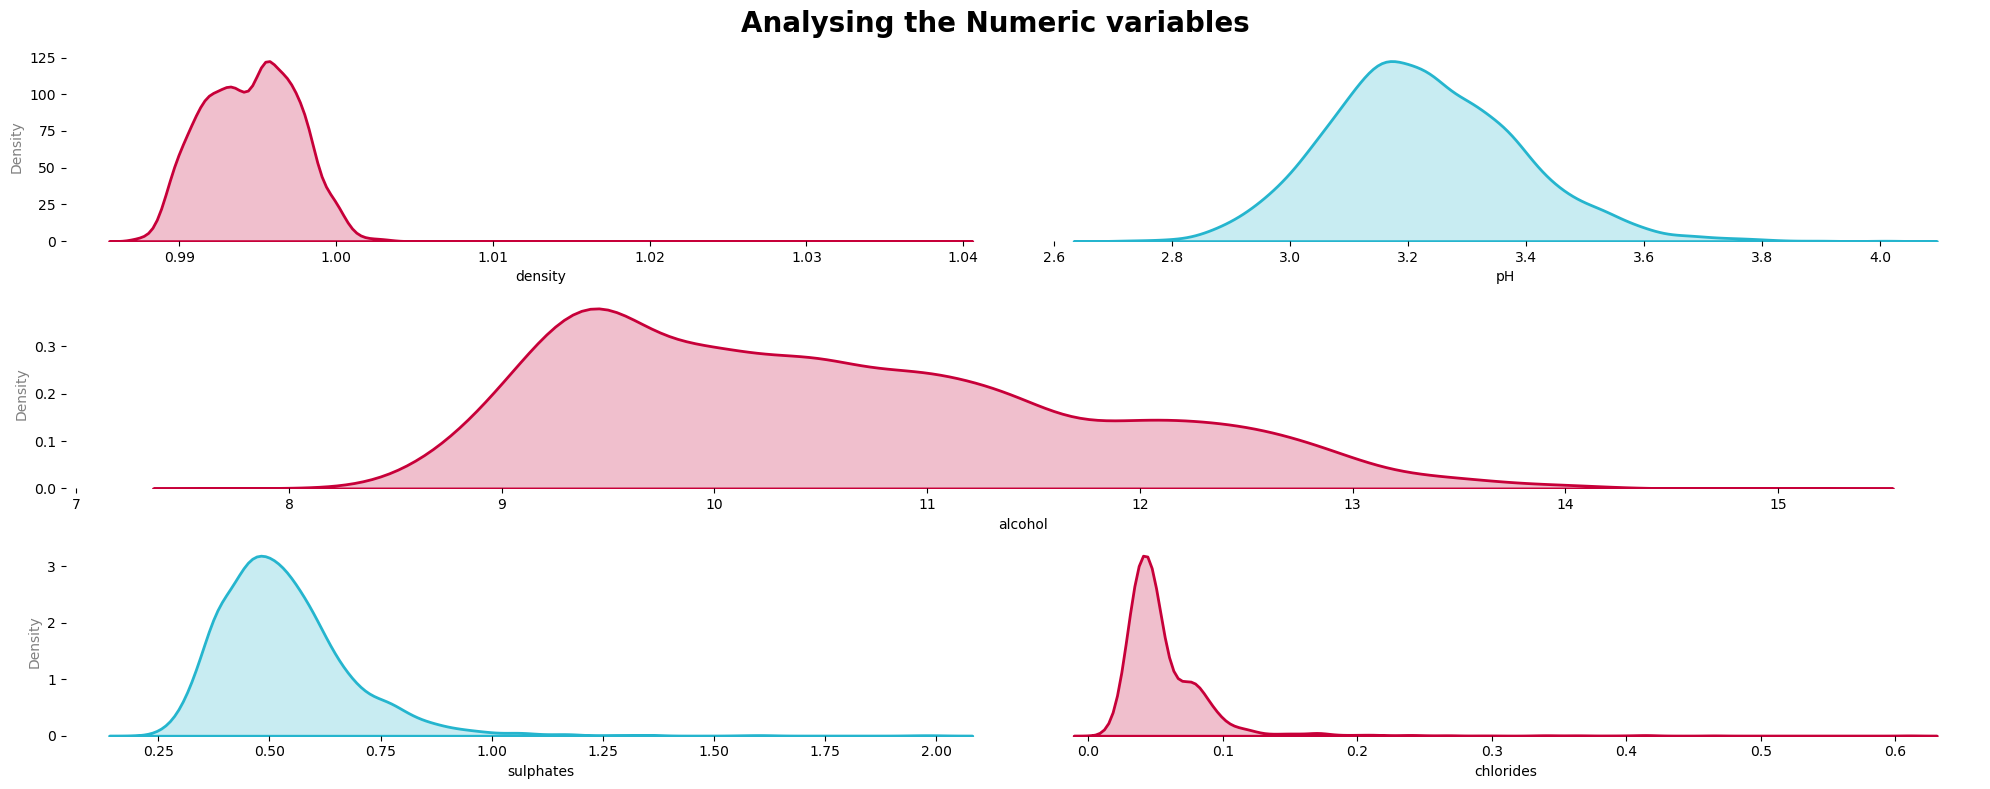

In [23]:
#integer columns
colors = ['#C70039','#25B5CE']
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df['density'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df['pH'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['alcohol'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df['sulphates'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['chlorides'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

1. Density Distribution:

	* Shows a tight, normal distribution centered around 0.996-0.997
	* Very consistent values indicating wine density is relatively uniform across samples
	* Minimal outliers suggest good data quality
2. pH Levels:

	* Nearly perfect normal distribution ranging from 2.8 to 4.0
	* Peak around 3.2-3.4, indicating most wines are moderately acidic
	* Well-balanced acidity across the dataset
3. Alcohol Content:

	* Right-skewed distribution with most wines having 9-11% alcohol
	* Long tail extending to 15%, showing some high-alcohol wines
	* Peak around 9.5% suggests preference for moderate alcohol content
4. Sulphates:

	* Left-skewed distribution with most values between 0.4-0.8
	* Few wines have very high sulphate levels (>1.5)
	* Concentration around 0.6 indicates standard preservation practices
5. Chlorides:

	* Highly concentrated around 0.07-0.08 with extreme right skew
	* Very few wines have high chloride content
	* Tight distribution suggests consistent salt levels in wine production

### Fixed Acidity vs Citric Acid by Quality

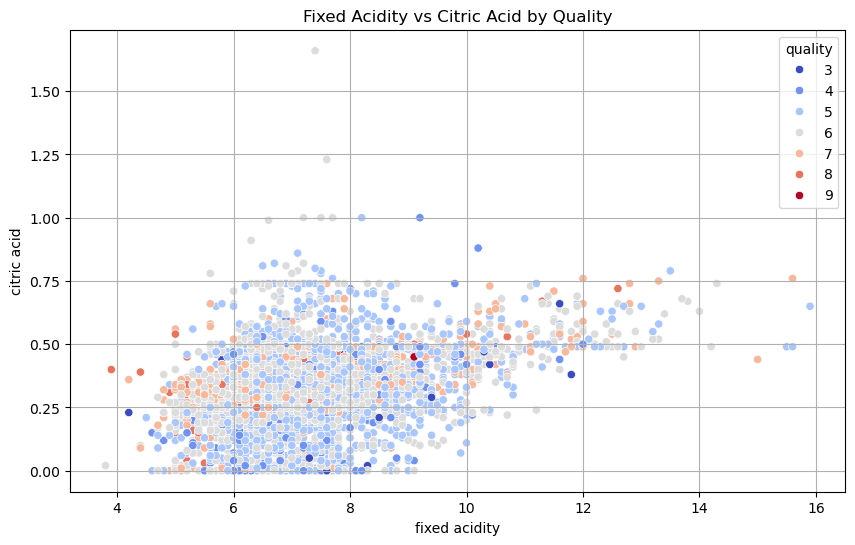

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fixed acidity', y='citric acid', hue='quality', palette='coolwarm')
plt.title('Fixed Acidity vs Citric Acid by Quality')
plt.grid(True)
plt.show()

* Fixed acidity and citric acid show a moderate positive correlation, indicating that wines with higher fixed acidity tend to have more citric acid.
* Higher quality wines (7–9) are mostly concentrated in the mid to upper range of both acids, suggesting a balanced acidic profile contributes to better ratings.
* Lower quality wines (3–5) are more dispersed and appear frequently at low citric acid levels, reflecting less favorable acidity composition.

### Alcohol Content Analysis

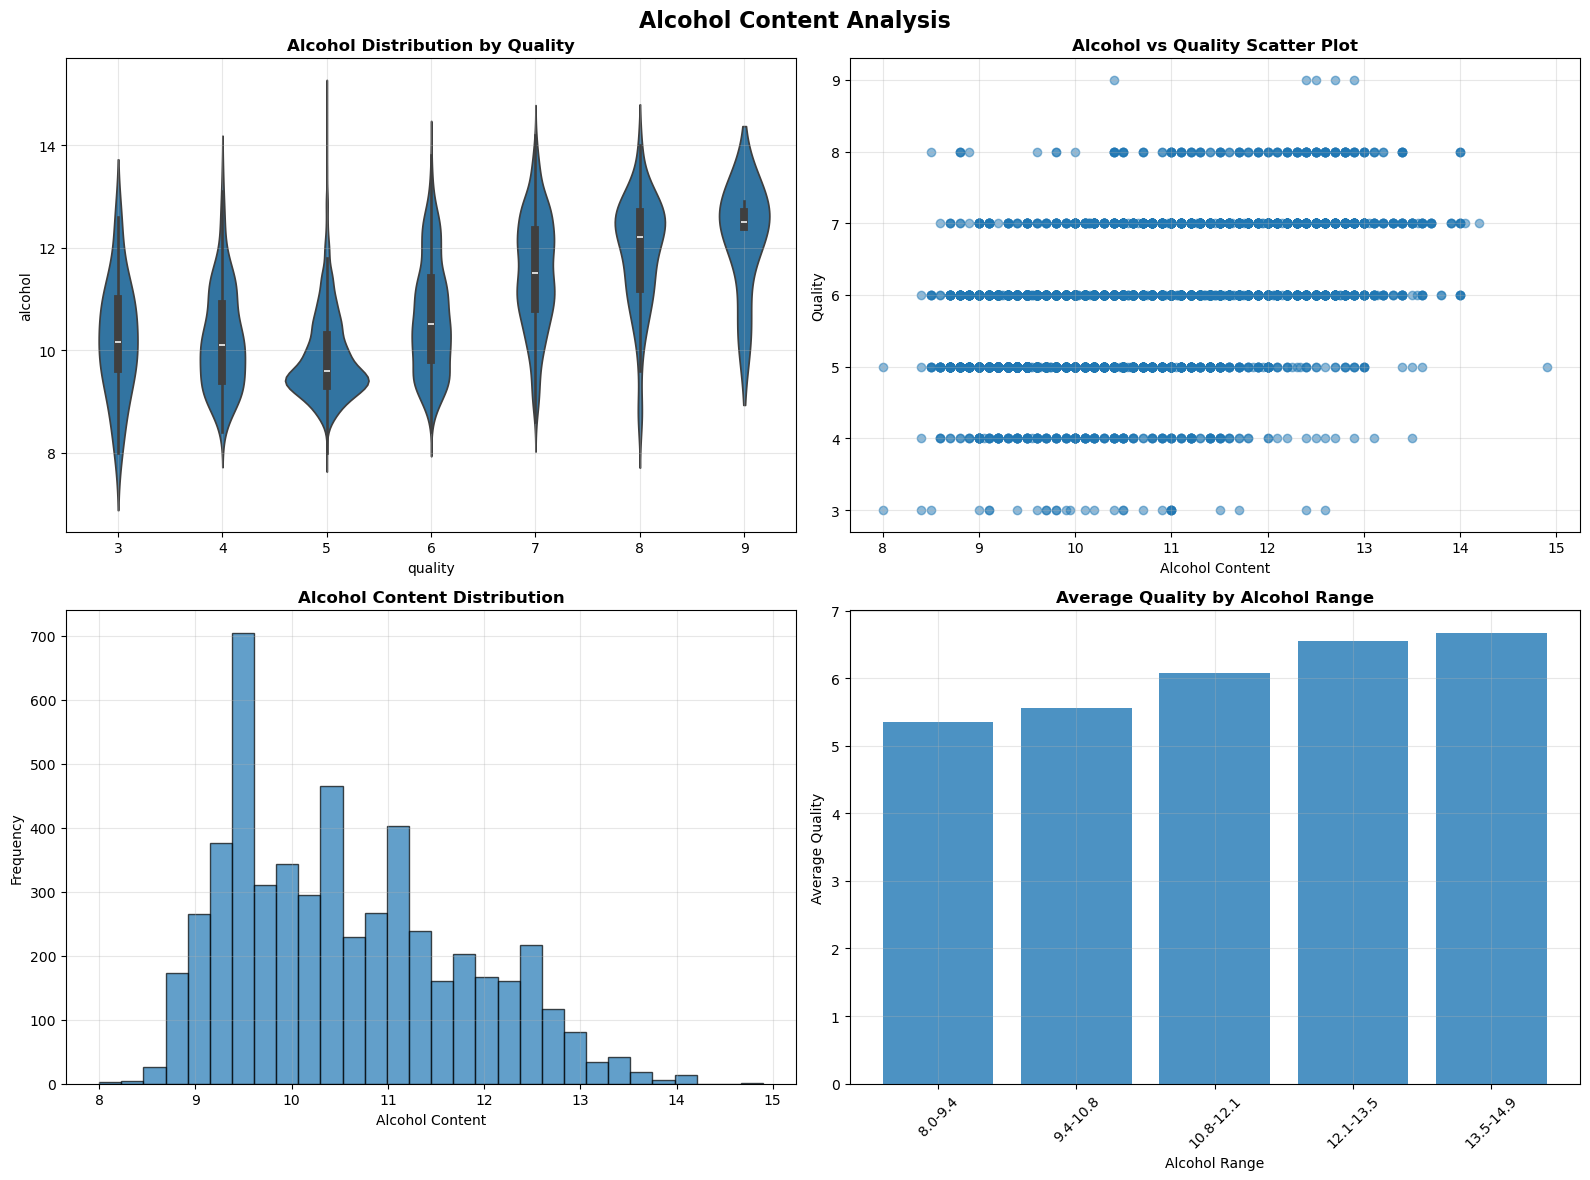

In [56]:
# Detailed alcohol analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Alcohol Content Analysis', fontsize=16, fontweight='bold')

# Alcohol distribution by quality
sns.violinplot(data=df, x='quality', y='alcohol', ax=axes[0,0])
axes[0,0].set_title('Alcohol Distribution by Quality', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Alcohol vs Quality scatter
axes[0,1].scatter(df['alcohol'], df['quality'], alpha=0.5)
axes[0,1].set_xlabel('Alcohol Content')
axes[0,1].set_ylabel('Quality')
axes[0,1].set_title('Alcohol vs Quality Scatter Plot', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Alcohol histogram
axes[1,0].hist(df['alcohol'], bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Alcohol Content')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Alcohol Content Distribution', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Quality means by alcohol ranges
df['alcohol_range'] = pd.cut(df['alcohol'], bins=5)
alcohol_quality = df.groupby('alcohol_range')['quality'].mean()
axes[1,1].bar(range(len(alcohol_quality)), alcohol_quality.values, alpha=0.8)
axes[1,1].set_xticks(range(len(alcohol_quality)))
axes[1,1].set_xticklabels([f'{interval.left:.1f}-{interval.right:.1f}' 
                          for interval in alcohol_quality.index], rotation=45)
axes[1,1].set_xlabel('Alcohol Range')
axes[1,1].set_ylabel('Average Quality')
axes[1,1].set_title('Average Quality by Alcohol Range', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

* Higher quality wines (scores 7-9) consistently show higher alcohol content
* The violin plot clearly shows quality scores 8-9 have the widest alcohol distribution around 11-13%
* Lower quality wines (3-5) cluster around 9-11% alcohol content
* Most wines fall in the 9-12% alcohol range (histogram shows normal distribution)
* Quality ratings are heavily concentrated between 5-7, with fewer premium (8-9) wines
* The scatter plot reveals a clear positive correlation - as alcohol increases, quality tends to improve
* The bar chart shows a steady upward trend in average quality across alcohol ranges
* Wines with 12.4-14.5% alcohol achieve the highest average quality scores
* There's approximately a 1-point quality increase from lowest to highest alcohol ranges

Higher alcohol content appears to be a strong predictor of wine quality in this dataset. This could indicate that:
* Premium wines undergo longer fermentation processes
* Higher sugar content in quality grapes leads to more alcohol
* Consumer preferences favor wines with more body and complexity

### Density vs Alcohol

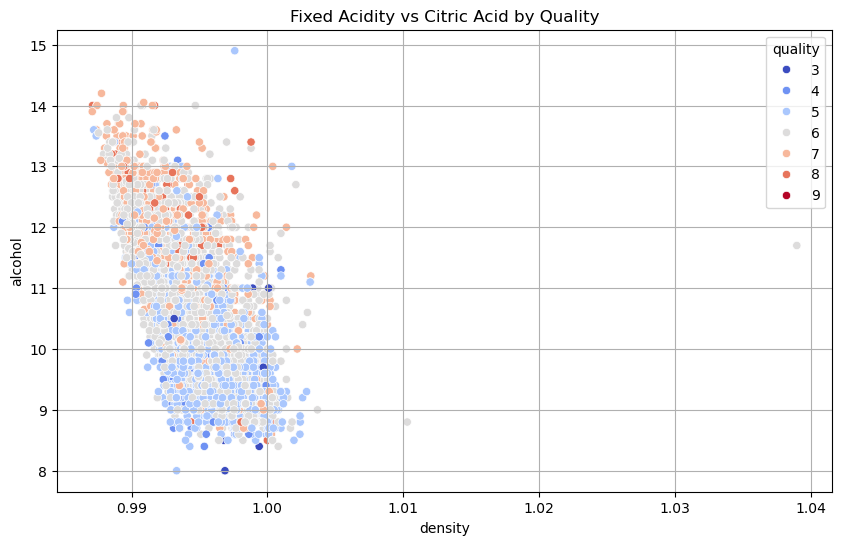

In [25]:
# scatter plot of density vs alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='density', y='alcohol', hue='quality', palette='coolwarm')
plt.title('Fixed Acidity vs Citric Acid by Quality')
plt.grid(True)
plt.show()

* Strong Negative Correlation: There's a clear inverse relationship between density and alcohol content - as alcohol increases, density decreases. This makes scientific sense since alcohol is less dense than water.
* Higher quality wines (red/orange points, scores 7-9) tend to cluster in the lower density, higher alcohol region of the plot (upper left area).
*The best wines appear to have:
	* Density around 0.99-1.00 g/cm³
	* Alcohol content between 11-14%
* Poorer quality wines (blue points, scores 3-5) are more scattered across density ranges but generally have lower alcohol content.
* This relationship reflects the fermentation process - higher sugar content in quality grapes ferments to produce more alcohol, which simultaneously reduces the wine's overall density.
* This visualization reinforces that alcohol content and density are strong predictors of wine quality, with premium wines achieving an optimal balance of higher alcohol and lower density through superior grape quality and fermentation processes.

### Acidity Analysis

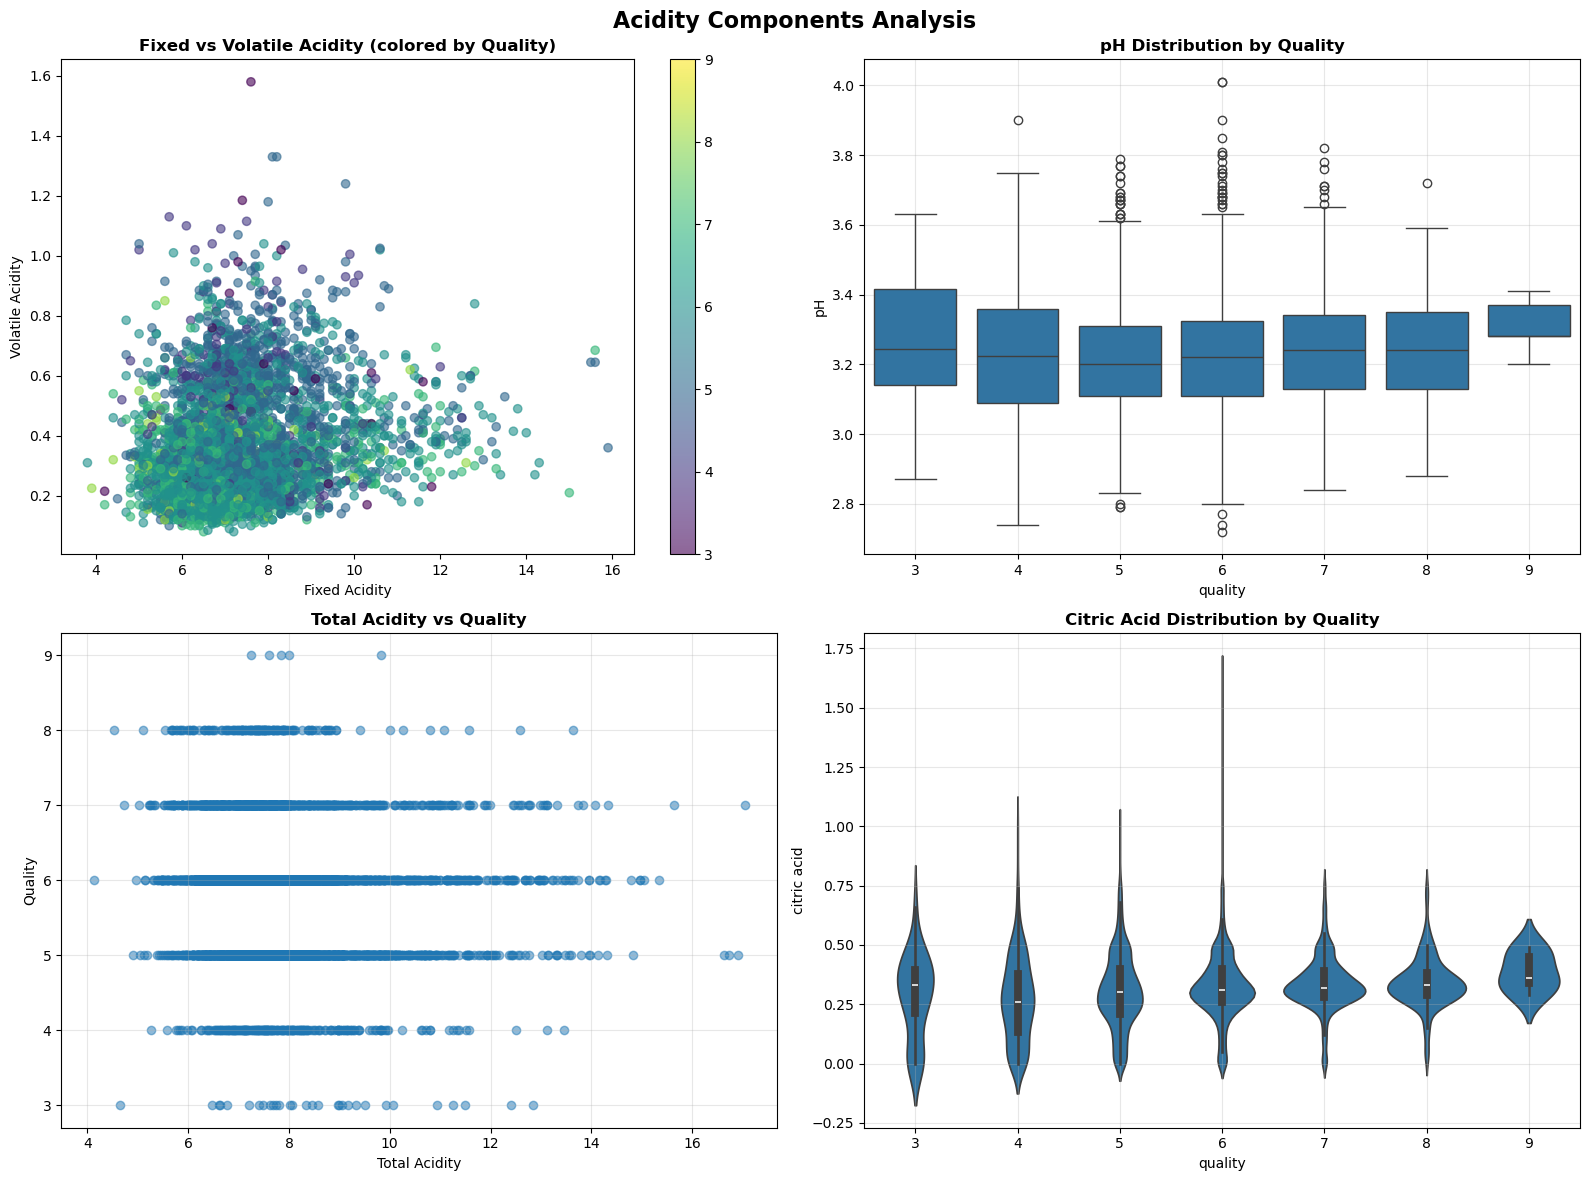

In [57]:
# Acidity components analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Acidity Components Analysis', fontsize=16, fontweight='bold')

# Fixed vs Volatile Acidity
scatter = axes[0,0].scatter(df['fixed acidity'], df['volatile acidity'], 
                           c=df['quality'], cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Fixed Acidity')
axes[0,0].set_ylabel('Volatile Acidity')
axes[0,0].set_title('Fixed vs Volatile Acidity (colored by Quality)', fontweight='bold')
plt.colorbar(scatter, ax=axes[0,0])

# pH distribution by quality
sns.boxplot(data=df, x='quality', y='pH', ax=axes[0,1])
axes[0,1].set_title('pH Distribution by Quality', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Create total acidity feature
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
axes[1,0].scatter(df['total_acidity'], df['quality'], alpha=0.5)
axes[1,0].set_xlabel('Total Acidity')
axes[1,0].set_ylabel('Quality')
axes[1,0].set_title('Total Acidity vs Quality', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Citric acid impact
sns.violinplot(data=df, x='quality', y='citric acid', ax=axes[1,1])
axes[1,1].set_title('Citric Acid Distribution by Quality', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Fixed vs Volatile Acidity Relationship:

	* Most wines cluster in the lower-left region (6-10 fixed acidity, 0.2-0.8 volatile acidity)
	* Higher quality wines (lighter colors) tend to have moderate fixed acidity and lower volatile acidity
	* Extreme combinations of high fixed and volatile acidity are rare and don't correlate with premium quality

2. pH Distribution Patterns:

	* Wine quality shows a narrow pH range (3.0-3.5) across all quality levels
	* Quality 5-6 wines have slightly more pH variation, while premium wines (7-8) maintain more consistent pH levels
	* This suggests pH balance is crucial for quality wines

3. Total Acidity vs Quality:

	* No strong linear relationship between total acidity and quality
	* Quality wines exist across various total acidity levels (8-16)
	* This indicates that acidity balance matters more than absolute acidity levels

4. Citric Acid Distribution:

	* Higher quality wines (6-8) show wider citric acid distributions
	* Quality 7-8 wines have notable citric acid presence, suggesting it contributes to complexity
	* Lower quality wines cluster around minimal citric acid levels

Overall Conclusion: Wine quality depends on balanced acidity composition rather than high absolute acidity values. Premium wines maintain optimal pH while leveraging citric acid for complexity.

### Top 5 Most Acidic Wines and Their Quality

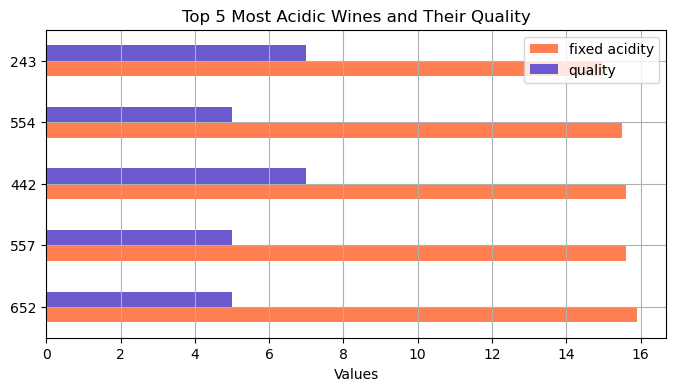

In [26]:
top_acidic = df.sort_values(by='fixed acidity', ascending=False).head(5)
top_acidic[['fixed acidity', 'quality']].plot(kind='barh', color=['coral', 'slateblue'], figsize=(8, 4))
plt.title('Top 5 Most Acidic Wines and Their Quality')
plt.xlabel('Values')
plt.grid(True)
plt.show()

* The top 5 most acidic wines have fixed acidity values above 15, indicating extremely high acid concentration compared to the rest of the dataset.
* Despite high acidity, their quality scores range from 5 to 7, showing that high acidity alone does not guarantee superior wine quality.
* This suggests that wine quality depends on a balanced composition, and extreme acidity may not be favorable without other supporting attributes.

### Sulphate Levels by Quality

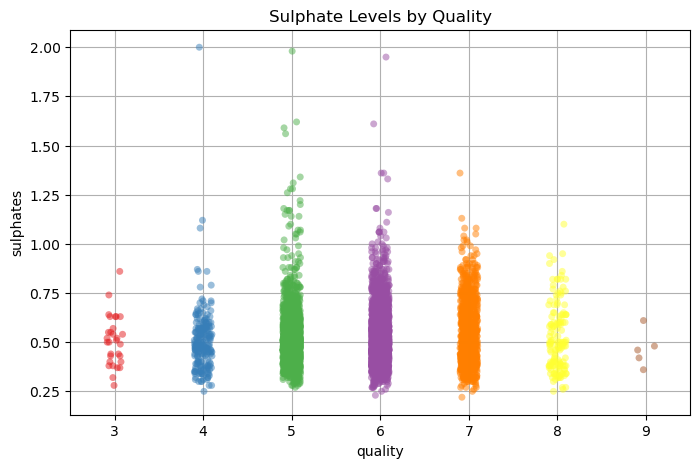

In [27]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='quality', y='sulphates', data=df, palette='Set1', jitter=True, alpha=0.5)
plt.title('Sulphate Levels by Quality')
plt.grid(True)
plt.show()

* Sulphate levels tend to be higher and more varied in wines with quality scores between 5 and 7, indicating their potential contribution to wine preservation and taste.
* Lower quality wines (3–4) generally have lower sulphate concentrations, suggesting a possible link between sulphate deficiency and poor quality.
* High-quality wines (8–9) show moderate sulphate levels, implying that balanced sulphate content, rather than extremes, is associated with better wine quality.

### Sulfur dioxide analysis


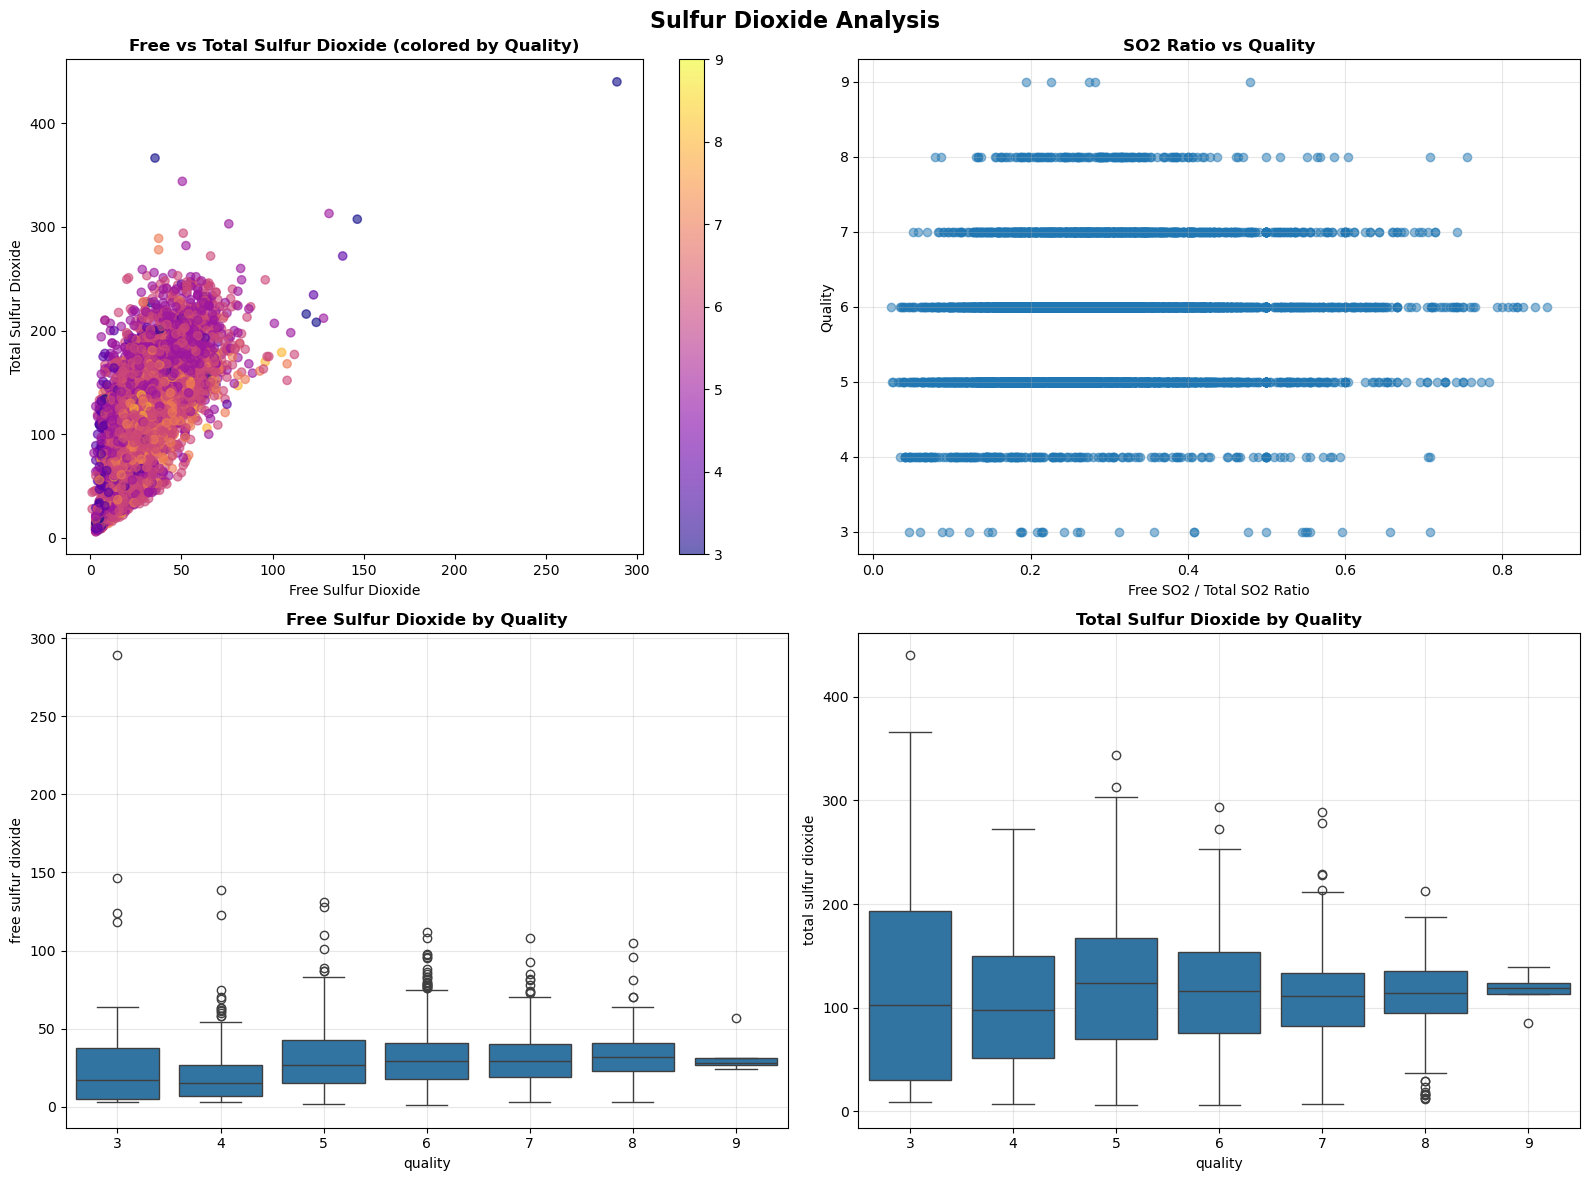

In [58]:
# Sulfur dioxide analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sulfur Dioxide Analysis', fontsize=16, fontweight='bold')

# Free vs Total SO2
scatter = axes[0,0].scatter(df['free sulfur dioxide'], df['total sulfur dioxide'], 
                           c=df['quality'], cmap='plasma', alpha=0.6)
axes[0,0].set_xlabel('Free Sulfur Dioxide')
axes[0,0].set_ylabel('Total Sulfur Dioxide')
axes[0,0].set_title('Free vs Total Sulfur Dioxide (colored by Quality)', fontweight='bold')
plt.colorbar(scatter, ax=axes[0,0])

# SO2 ratio analysis
df['so2_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
axes[0,1].scatter(df['so2_ratio'], df['quality'], alpha=0.5)
axes[0,1].set_xlabel('Free SO2 / Total SO2 Ratio')
axes[0,1].set_ylabel('Quality')
axes[0,1].set_title('SO2 Ratio vs Quality', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Free SO2 by quality
sns.boxplot(data=df, x='quality', y='free sulfur dioxide', ax=axes[1,0])
axes[1,0].set_title('Free Sulfur Dioxide by Quality', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Total SO2 by quality
sns.boxplot(data=df, x='quality', y='total sulfur dioxide', ax=axes[1,1])
axes[1,1].set_title('Total Sulfur Dioxide by Quality', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Free vs Total SO2 Relationship:

	* Strong positive correlation between free and total sulfur dioxide levels
	* Higher quality wines (shown in yellow/bright colors) tend to cluster in moderate SO2 ranges
	* Most wines fall within a predictable ratio band, suggesting optimal preservation balance

2. SO2 Ratio Impact:

	* The free SO2 to total SO2 ratio shows minimal correlation with quality
	* Most wines maintain ratios between 0.2-0.6, indicating consistent preservation practices
	* Quality appears independent of this specific ratio

3. Free Sulfur Dioxide Patterns:

	* Quality ratings 5-7 show similar median free SO2 levels (around 30-35 mg/L)
	* Lower and higher quality wines (3-4, 8-9) have slightly different distributions
	* Moderate free SO2 levels appear optimal for wine quality

4. Total Sulfur Dioxide Trends:

	* Higher quality wines (7-8) tend to have slightly lower total SO2 levels
	* Quality 3-6 wines show higher median total SO2, suggesting over-preservation may negatively impact taste
	* Optimal range appears to be 100-150 mg/L for better quality wines

Key Takeaway: Moderate sulfur dioxide levels with balanced free-to-total ratios correlate with higher wine quality, while excessive preservation (high total SO2) may compromise taste quality.

### Pairwise Plots for High-Quality Wines

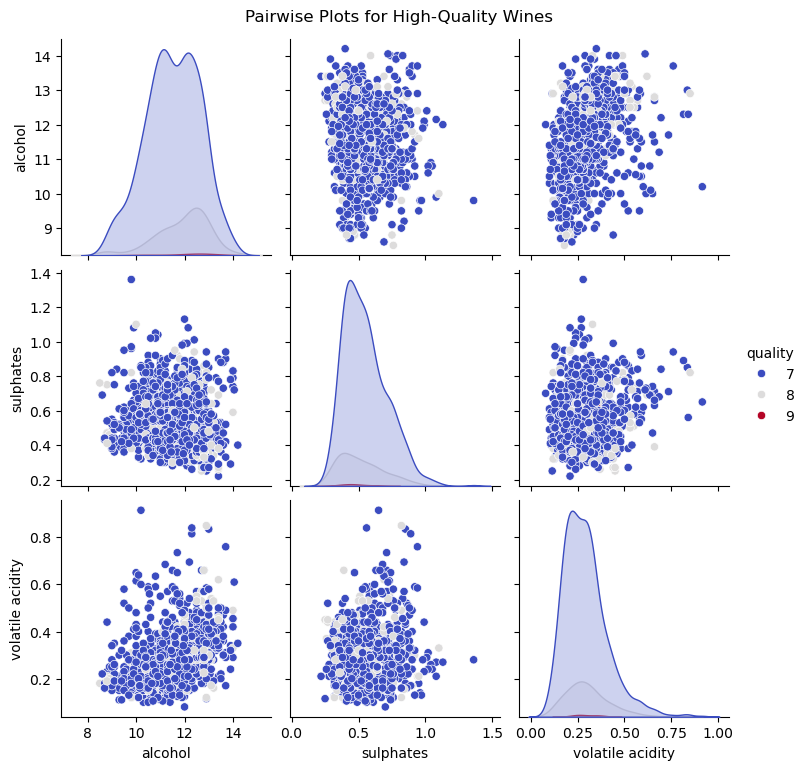

In [28]:
high_quality = df[df['quality'] >= 7]
sns.pairplot(high_quality[['alcohol', 'sulphates', 'volatile acidity', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Plots for High-Quality Wines', y=1.02)
plt.show()

* High-quality wines (7–9) cluster around higher alcohol levels and moderate sulphate concentrations, reinforcing their positive impact on quality.
* Volatile acidity is generally low and tightly distributed, suggesting that reduced acidity is a consistent trait among top-rated wines.
* The pairwise plots reveal no strong linear relationships among features, but the concentration patterns highlight preferred chemical profiles for high-quality wines.

### Statistical Summary by Quality Groups

Statistical Summary by Quality Groups:
              alcohol        volatile acidity        citric acid         \
                 mean    std             mean    std        mean    std   
quality_group                                                             
Low (3-5)       9.913  0.858            0.403  0.193       0.302  0.164   
Medium (6-7)   10.881  1.177            0.309  0.141       0.328  0.136   
High (8-9)     11.921  1.074            0.303  0.117       0.342  0.106   

              residual sugar        chlorides        free sulfur dioxide  \
                        mean    std      mean    std                mean   
quality_group                                                              
Low (3-5)              5.329  4.732     0.066  0.045              28.945   
Medium (6-7)           4.890  4.382     0.052  0.030              30.561   
High (8-9)             4.750  3.619     0.040  0.015              33.118   

                      total sulfur dioxide         de

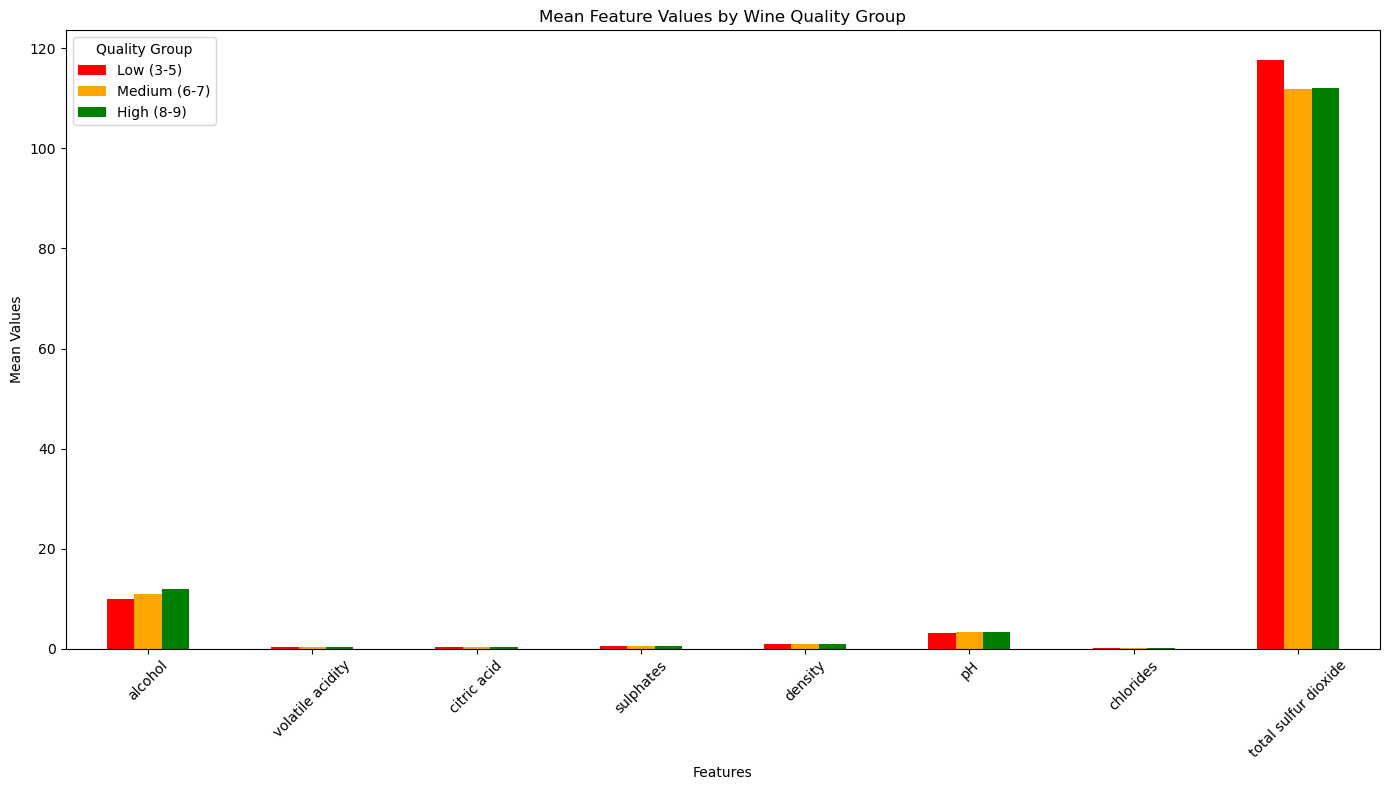

In [63]:
# Create quality groups for better analysis
df['quality_group'] = pd.cut(df['quality'], bins=[2, 5, 7, 10], 
                            labels=['Low (3-5)', 'Medium (6-7)', 'High (8-9)'])

# Statistical summary by quality groups
summary_stats = df.groupby('quality_group').agg({
    'alcohol': ['mean', 'std'],
    'volatile acidity': ['mean', 'std'],
    'citric acid': ['mean', 'std'],
    'residual sugar': ['mean', 'std'],
    'chlorides': ['mean', 'std'],
    'free sulfur dioxide': ['mean', 'std'],
    'total sulfur dioxide': ['mean', 'std'],
    'density': ['mean', 'std'],
    'pH': ['mean', 'std'],
    'sulphates': ['mean', 'std']
}).round(3)

print("Statistical Summary by Quality Groups:")
print("=====================================")
print(summary_stats)

# Visualize means by quality group
fig, ax = plt.subplots(figsize=(14, 8))
features_to_plot = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 
                   'density', 'pH', 'chlorides', 'total sulfur dioxide']

means_by_group = df.groupby('quality_group')[features_to_plot].mean()
means_by_group.T.plot(kind='bar', ax=ax, color=['red', 'orange', 'green'])
ax.set_title('Mean Feature Values by Wine Quality Group')
ax.set_xlabel('Features')
ax.set_ylabel('Mean Values')
ax.legend(title='Quality Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* High-quality wines have significantly higher alcohol content (~ 11.9%) compared to low-quality wines (~ 9.9%)
* This shows a clear positive correlation between alcohol and wine quality
* Lower quality wines have higher volatile acidity (0.403), which decreases as quality improves
* High volatile acidity is associated with undesirable vinegar-like flavors
* Low quality wines have the highest levels (~117.7 mg/L)
* Medium and high quality wines have lower, similar levels (~111.9-112.1 mg/L)
* Higher sulfur dioxide correlates with lower quality - excessive sulfiting creates unpleasant flavors and indicates poor winemaking practices
* Quality wines require less sulfur dioxide due to better grape quality and careful handling
* Higher quality wines tend to have lower density (0.992 vs 0.996)
* This correlates with higher alcohol content, as alcohol is less dense than water
* High-quality wines show lower chlorides and better overall chemical balance
* Quality is about restraint and balance in chemical additions, not just presence/absence of compounds
* The most dramatic differences appear in alcohol content, volatile acidity, and total sulfur dioxide levels, making these the three key chemical indicators for wine quality prediction.

### Feature Importance from Random Forest

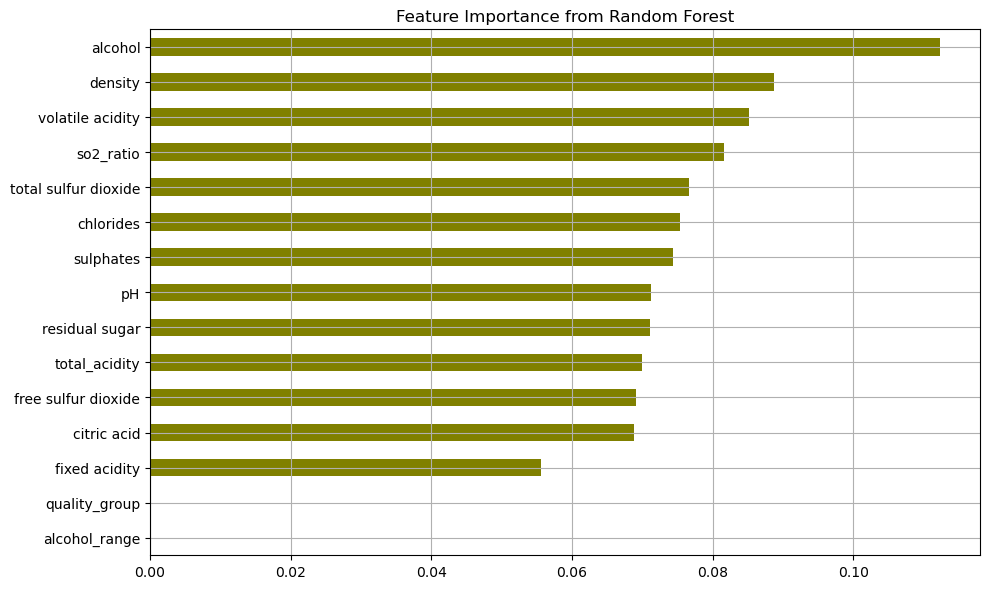

In [66]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Prepare the data
X = df.drop('quality', axis=1)
y = df['quality']

# Convert any interval columns to their midpoint values
for col in X.columns:
    if X[col].dtype == 'object' or str(X[col].dtype) == 'interval':
        # Check if the column contains intervals
        if hasattr(X[col].iloc[0], 'mid'):
            X[col] = X[col].apply(lambda x: x.mid if hasattr(x, 'mid') else x)
        # If it's categorical, convert to numerical codes
        elif X[col].dtype == 'object':
            X[col] = pd.Categorical(X[col]).codes

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values that might have been created
X = X.fillna(X.mean())

# Now fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Create feature importance plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='olive')
plt.title('Feature Importance from Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

* Alcohol is identified as the most important feature for predicting wine quality, followed closely by density and volatile acidity, confirming their strong influence.
* Other significant contributors include sulphates, total sulfur dioxide, and chlorides, which collectively impact preservation and taste.
* Features like citric acid and fixed acidity have lower importance, suggesting they play a less direct role in determining wine quality compared to others.

## Key Insights

* Optimize alcohol content during production to fall within the 12–13% range, as it is closely linked with higher quality perception.
* Implement strict control over volatile acidity, as lower levels are consistently found in better-rated wines and enhance flavor stability.
* Focus on balanced sulphate levels, not extremes, to support wine preservation while maintaining taste quality.
* Avoid excessive residual sugar and high density, as these do not contribute to higher ratings and may negatively affect mouthfeel.
* Use citric acid and fixed acidity cautiously, maintaining moderate levels to support flavor complexity without over-acidifying the wine.
* Leverage predictive modeling (e.g., Random Forests) using key features like alcohol, volatile acidity, and density to assess and improve wine quality early in the production cycle.

## Overall Conclusion

* Alcohol content has the strongest positive correlation with wine quality, consistently appearing as the top feature in both correlation and feature importance analysis.
* Volatile acidity is negatively associated with wine quality, with high levels commonly found in lower-rated wines, impacting taste negatively.
* Density and residual sugar show a positive relationship, but do not correlate strongly with high-quality wines, indicating excess sweetness is not a key factor.
* Sulphates and citric acid have a moderate positive influence, with better wines generally maintaining a balanced acidic profile.
* pH levels show no strong pattern across quality ratings, implying that pH alone is not a reliable indicator of wine quality.
* High-quality wines (7–9) share a distinct cluster with higher alcohol, lower volatile acidity, and moderate sulphate levels, suggesting a preferred chemical signature.